#### This dataset contains information collected from a ride-sharing application. The data includes various features related to user details, trip characteristics, environmental conditions, and geographical factors. Below is a brief description of the features included:

##### User ID: Unique identifier for each user.
##### User Name: Name of the user.
##### Driver Name: Name of the driver.
##### Car Condition: Condition of the vehicle.
##### Weather: Weather conditions at the time of the trip.
##### Traffic Condition: Traffic congestion level.
##### Key: Unique key for each trip.
##### Fare Amount: Fare charged for the trip.
##### Pickup Datetime: Date and time of pickup.
##### Pickup Longitude: Longitude coordinate of pickup location.
##### Pickup Latitude: Latitude coordinate of pickup location.
##### Dropoff Longitude: Longitude coordinate of drop-off location.
##### Dropoff Latitude: Latitude coordinate of drop-off location.
##### Passenger Count: Number of passengers.
##### Hour: Hour of the day of pickup.
##### Day: Day of the month of pickup.
##### Month: Month of the year of pickup.
##### Weekday: Day of the week of pickup.
##### Year: Year of the trip.
##### JFK Dist: Distance to JFK Airport.
##### EWR Dist: Distance to Newark Airport.
##### LGA Dist: Distance to LaGuardia Airport.
##### SOL Dist: Distance to Statue of Liberty.
##### NYC Dist: Distance to New York City center.
##### Distance: Distance of the trip.
##### Bearing: Direction of the trip.

In [186]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install plotly
# !pip install scipy
# !pip install scikit-learn


#Imports

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# pip install plotly.express
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# EDA

In [188]:
#Make sure all columns are displayed while we use head function
pd.options.display.max_columns = None

In [189]:
df=pd.read_csv("D:/ML Task 2 Deployement/final_internship_data.csv")

In [190]:
df.head(n=10)

User ID          User Name       Driver Name Car Condition Weather  \
0  KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1  lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2  gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3  9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4  8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   
5  mMC7oPiW       Kayla Martin     Wendy Bennett     Excellent   sunny   
6  A2SNLxxM        James Burch      Casey Cannon     Excellent   windy   
7  tT6AJSJx   Alexander Ingram   Christy Hensley          Good   sunny   
8  D0Yb52vL       Anita Porter        Ana Norton     Excellent   rainy   
9  GorULe8F       Monica Smith     Daniel Vargas     Very Good   sunny   

   Traffic Condition                            key  fare_amount  \
0  Congested Traffic    2009-06-15 17:26:21.0000001          4.5   
1       Flow Traffic    2010-01-05 16:52:16.0000002         16.9   
2  Congested Traffic   2011-08-18 00:35:00.00000049          5.7   
3       Flow Traffic    2012-04-21 04:30:42.0000001          7.7   
4  Congested Traffic  2010-03-09 07:51:00.000000135          5.3   
5  Congested Traffic    2011-01-06 09:50:45.0000002         12.1   
6       Flow Traffic    2012-11-20 20:35:00.0000001          7.5   
7  Congested Traffic   2012-01-04 17:22:00.00000081         16.5   
8      Dense Traffic  2012-12-03 13:10:00.000000125          9.0   
9      Dense Traffic   2009-09-02 01:11:00.00000083          8.9   

       pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
0  2009-06-15 17:26:21         -1.288826         0.710721          -1.288779   
1  2010-01-05 16:52:16         -1.291824         0.710546          -1.291182   
2  2011-08-18 00:35:00         -1.291242         0.711418          -1.291391   
3  2012-04-21 04:30:42         -1.291319         0.710927          -1.291396   
4  2010-03-09 07:51:00         -1.290987         0.711536          -1.290787   
5  2011-01-06 09:50:45         -1.291560         0.710901          -1.291071   
6  2012-11-20 20:35:00         -1.291195         0.711251          -1.291086   
7  2012-01-04 17:22:00         -1.290694         0.711643          -1.291371   
8  2012-12-03 13:10:00         -1.291656         0.710815          -1.291423   
9  2009-09-02 01:11:00         -1.291206         0.710940          -1.291396   

   dropoff_latitude  passenger_count  hour  day  month  weekday  year  \
0          0.710563                1    17   15      6        0  2009   
1          0.711780                1    16    5      1        1  2010   
2          0.711231                2     0   18      8        3  2011   
3          0.711363                1     4   21      4        5  2012   
4          0.711811                1     7    9      3        1  2010   
5          0.711365                1     9    6      1        3  2011   
6          0.711481                1    20   20     11        1  2012   
7          0.711240                1    17    4      1        2  2012   
8          0.710901                1    13    3     12        0  2012   
9          0.711364                2     1    2      9        2  2009   

    jfk_dist   ewr_dist   lga_dist   sol_dist   nyc_dist  distance   bearing  
0  20.265840  55.176046  14.342611  34.543548  27.572573  1.030764 -2.918897  
1  44.667679  31.832358  23.130775  15.125872   8.755732  8.450134 -0.375217  
2  43.597686  33.712082  19.865289  17.722624   9.847344  1.389525  2.599961  
3  42.642965  32.556289  21.063132  15.738963   7.703421  2.799270  0.133905  
4  43.329953  39.406828  15.219339  23.732406  15.600745  1.999157 -0.502703  
5  42.335622  32.824930  20.648176  15.741133   7.649541  3.787239 -0.674251  
6  42.563234  35.482608  18.113693  19.126670  10.993150  1.555807 -0.342260  
7  42.533214  36.829343  16.949505  20.548489  12.449213  4.155444  2.236596  
8  42.240568  29.608237  23.942272  11.66760

In [191]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [192]:
df.shape

(500000, 26)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [194]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [195]:
df.dropna(inplace=True)

In [196]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 499995 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            499995 non-null  object 
 1   User Name          499995 non-null  object 
 2   Driver Name        499995 non-null  object 
 3   Car Condition      499995 non-null  object 
 4   Weather            499995 non-null  object 
 5   Traffic Condition  499995 non-null  object 
 6   key                499995 non-null  object 
 7   fare_amount        499995 non-null  float64
 8   pickup_datetime    499995 non-null  object 
 9   pickup_longitude   499995 non-null  float64
 10  pickup_latitude    499995 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    499995 non-null  int64  
 14  hour               499995 non-null  int64  
 15  day                499995 non-null  int64  
 16  month  

In [197]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  499995.000000     499995.000000    499995.000000      499995.000000   
mean       11.358182         -1.265714         0.696742          -1.265755   
std         9.916069          0.206934         0.140906           0.205903   
min       -44.900000        -52.119764       -54.389440         -59.049665   
25%         6.000000         -1.291405         0.710958          -1.291393   
50%         8.500000         -1.291226         0.711268          -1.291197   
75%        12.500000         -1.290970         0.711520          -1.290908   
max       500.000000         37.360538        29.724576           0.712985   

       dropoff_latitude  passenger_count           hour            day  \
count     499995.000000    499995.000000  499995.000000  499995.000000   
mean           0.696675         1.683445      13.510843      15.684239   
std            0.128997         1.307391       6.511596       8.681092   
min          -44.676047         0.000000       0.000000       1.000000   
25%            0.710943         1.000000       9.000000       8.000000   
50%            0.711277         1.000000      14.000000      16.000000   
75%            0.711538         2.000000      19.000000      23.000000   
max            7.061893         6.000000      23.000000      31.000000   

               month        weekday           year       jfk_dist  \
count  499995.000000  499995.000000  499995.000000  499995.000000   
mean        6.268617       3.042020    2011.739129     385.279367   
std         3.437798       1.949243       1.860897    2419.087483   
min         1.000000       0.000000    2009.000000       1.017646   
25%         3.000000       1.000000    2010.000000      41.341514   
50%         6.000000       3.000000    2012.000000      42.523163   
75%         9.000000       5.000000    2013.000000      43.785649   
max        12.000000       6.000000    2015.000000   30133.067880   

            ewr_dist       lga_dist       sol_dist       nyc_dist  \
count  499995.000000  499995.000000  499995.000000  499995.000000   
mean      380.503657     363.843772     363.674038     355.991423   
std      2428.804740    2425.075903    2428.348683    2428.730839   
min         1.460945       0.382119       0.532545       0.080500   
25%        32.173712      17.100762      14.886989       7.147384   
50%        34.787507      19.591554      18.347580      10.458151   
75%        38.304502      22.214815      22.417812      14.448699   
max     30167.595967   30167.285794   30159.407296   30162.285356   

            distance        bearing  
count  499995.000000  499995.000000  
mean       19.468775       0.297145  
std       367.299601       1.804548  
min         0.000000      -3.141593  
25%         1.214550      -0.854721  
50%         2.116970      -0.050442  
75%         3.890070       2.206769  
max     12399.956433       3.141593

In [198]:
df.duplicated().sum()

0

In [199]:
df['User ID'].nunique()

499995

In [200]:
df['User Name'].nunique()

221673

In [201]:
df['User Name'].value_counts()

User Name
Michael Smith       224
Michael Johnson     200
Michael Brown       165
Michael Williams    158
James Smith         152
                   ... 
Cristina Marquez      1
Jack Bowers           1
Wanda Espinoza        1
Ralph Rivers          1
Dillon Jackson        1
Name: count, Length: 221673, dtype: int64

In [202]:
duplicated_user_count = (df['User Name'].duplicated(keep=False)).sum()

print("Number of duplicated user names in the dataset:", duplicated_user_count)

Number of duplicated user names in the dataset: 363609


In [203]:
#Replace duplicated ID'S with the First ID appear in the Dataset
first_user_id_for_name = df.groupby('User Name')['User ID'].transform('first')
df['User ID'] = first_user_id_for_name

# Visualization

## Ridesharing app is more frequently used during the first half of the year


<Axes: >

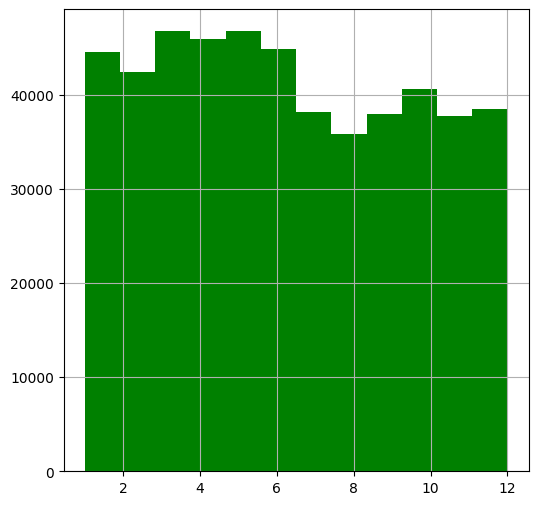

In [204]:
df['month'].hist(figsize=(6,6), bins=12, color='Green')


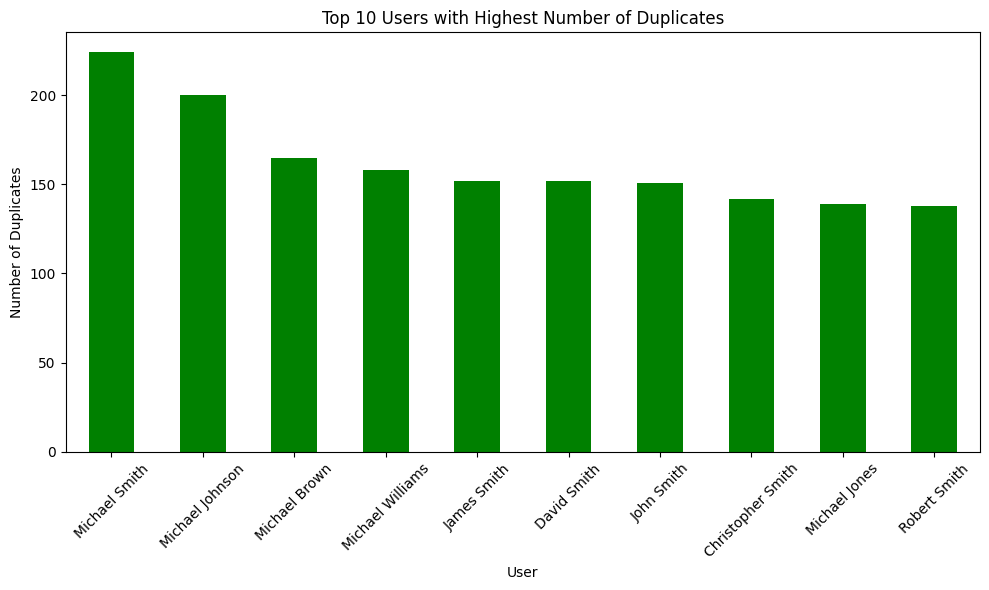

In [205]:
user_duplicates_count = df['User Name'].value_counts()


top_10_users = user_duplicates_count.head(10)




# Plot the top 10 users
plt.figure(figsize=(10, 6))
top_10_users.plot(kind='bar', color='green')
plt.title('Top 10 Users with Highest Number of Duplicates')
plt.xlabel('User')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [206]:
df['Driver Name'].value_counts()

Driver Name
Michael Smith       257
David Smith         191
Michael Johnson     183
Michael Williams    167
James Smith         164
                   ... 
Tammy Mayer           1
Kerry Carter          1
Juan Wheeler          1
Brandi Franco         1
Lonnie Santana        1
Name: count, Length: 221700, dtype: int64

In [207]:
users_same_as_driver=df[df['User Name'] == df['Driver Name']]
print(users_same_as_driver)
print(len(users_same_as_driver))

         User ID           User Name         Driver Name Car Condition  \
111091  pAS4Br9Q        James Miller        James Miller     Very Good   
126315  pjtWOHgX      Kevin Martinez      Kevin Martinez           Bad   
184338  wunMsxWE       Susan Johnson       Susan Johnson           Bad   
356313  SWFJaX4U     Kimberly Harvey     Kimberly Harvey     Excellent   
411016  JFQBtnTC          John Smith          John Smith     Very Good   
469397  0VMNjLe1    Melissa Martinez    Melissa Martinez     Excellent   
490084  RM2Xl5JX  Christopher Howard  Christopher Howard           Bad   

       Weather  Traffic Condition                            key  fare_amount  \
111091  stormy       Flow Traffic    2013-11-17 03:36:22.0000001         10.0   
126315   rainy       Flow Traffic    2014-01-19 02:54:40.0000002          3.0   
184338   windy       Flow Traffic  2014-01-13 09:07:00.000000171         14.5   
356313   rainy  Congested Traffic  2012-07-31 20:24:00.000000137          4.5   
41

In [208]:
same_driver_user_indices = df[df['Driver Name'] == df['User Name']].index

In [209]:
#drop rows with driver name is same as user name
df.drop(same_driver_user_indices,inplace=True)

In [210]:
df.shape

(499988, 26)

In [211]:
unique_users=df['User Name'].nunique()
unique_drivers=df['Driver Name'].nunique()
print(f"No of users in our platform is {unique_users} , No of Drivers in our platform is {unique_drivers} ")

No of users in our platform is 221673 , No of Drivers in our platform is 221700 


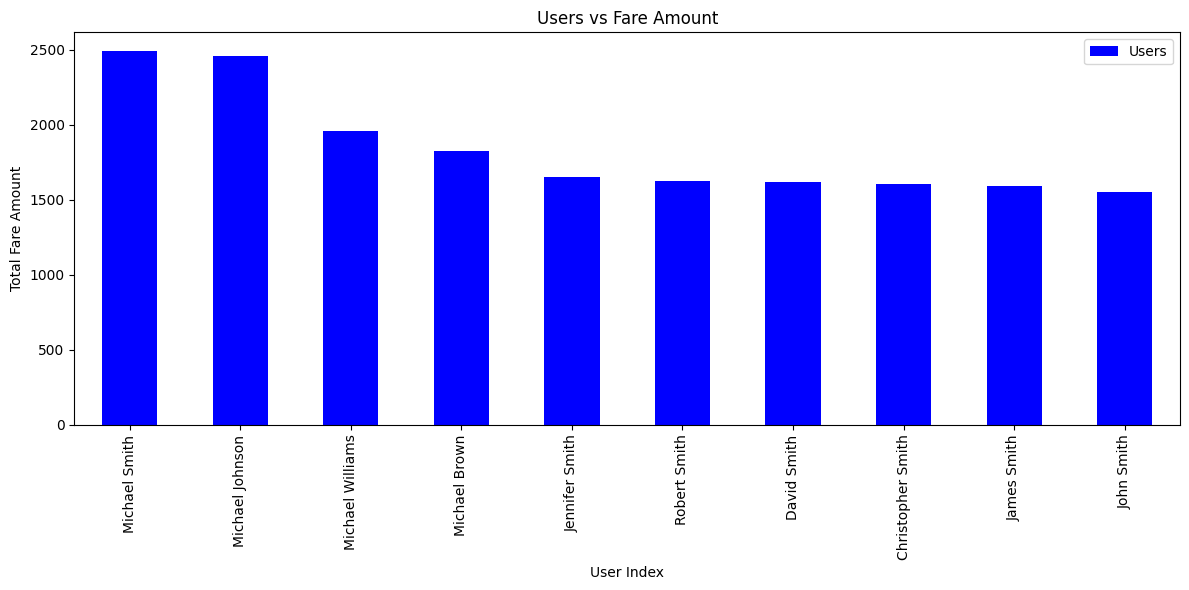

In [212]:
user_total_fare = df.groupby('User Name')['fare_amount'].sum()
top_10_users = user_total_fare.nlargest(10)
# Plot users vs fare amount
plt.figure(figsize=(12, 6))
top_10_users.plot(kind='bar', color='blue', label='Users')
plt.title('Users vs Fare Amount')
plt.xlabel('User Index')
plt.ylabel('Total Fare Amount')
plt.legend()
plt.tight_layout()
plt.show()

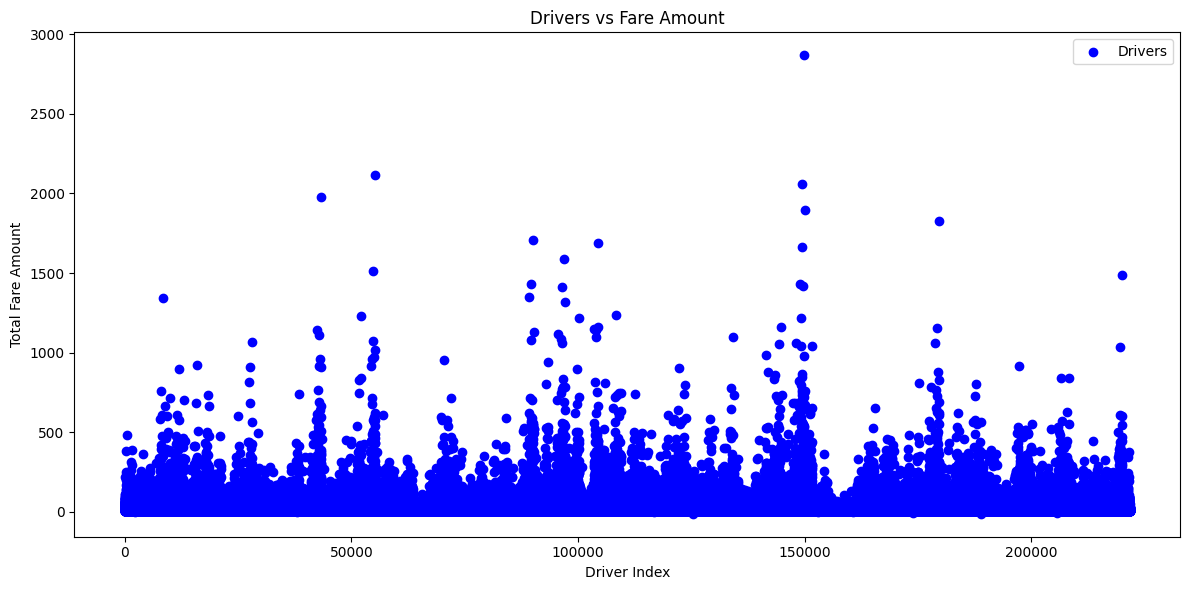

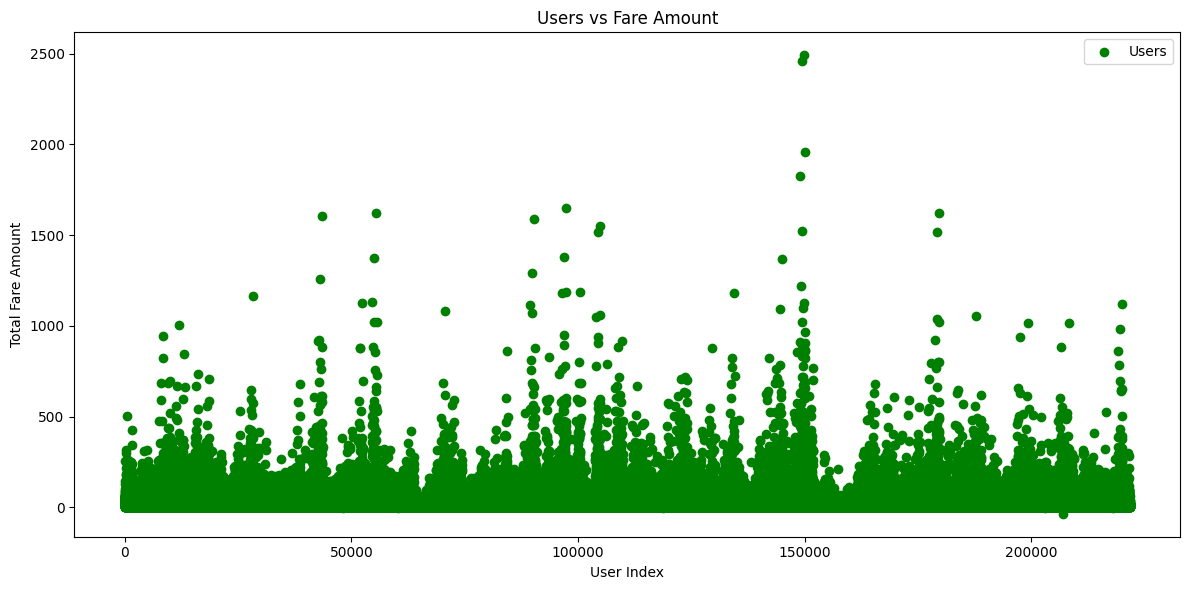

In [213]:
driver_total_fare = df.groupby('Driver Name')['fare_amount'].sum()

# Group by user name and calculate the total fare amount for each user
user_total_fare = df.groupby('User Name')['fare_amount'].sum()

# Plot drivers vs fare amount
plt.figure(figsize=(12, 6))
plt.scatter(range(len(driver_total_fare)), driver_total_fare.values, color='blue', label='Drivers')
plt.title('Drivers vs Fare Amount')
plt.xlabel('Driver Index')
plt.ylabel('Total Fare Amount')
plt.legend()
plt.tight_layout()
plt.show()

# Plot users vs fare amount
plt.figure(figsize=(12, 6))
plt.scatter(range(len(user_total_fare)), user_total_fare.values, color='green', label='Users')
plt.title('Users vs Fare Amount')
plt.xlabel('User Index')
plt.ylabel('Total Fare Amount')
plt.legend()
plt.tight_layout()
plt.show()

In [214]:
#Removing Outliers for both users and drivers
#driver_total_fare = df.groupby('Driver Name')['fare_amount'].sum()
#user_total_fare = df.groupby('User Name')['fare_amount'].sum()
#driver_fare_threshold = driver_total_fare.quantile(0.95)
#user_fare_threshold = user_total_fare.quantile(0.95)
#df = df[~df['Driver Name'].isin(driver_total_fare[driver_total_fare >= driver_fare_threshold].index)]
#df = df[~df['User Name'].isin(user_total_fare[user_total_fare >= user_fare_threshold].index)]

In [215]:
df['Car Condition'].value_counts()

Car Condition
Very Good    125308
Bad          124974
Good         124967
Excellent    124739
Name: count, dtype: int64

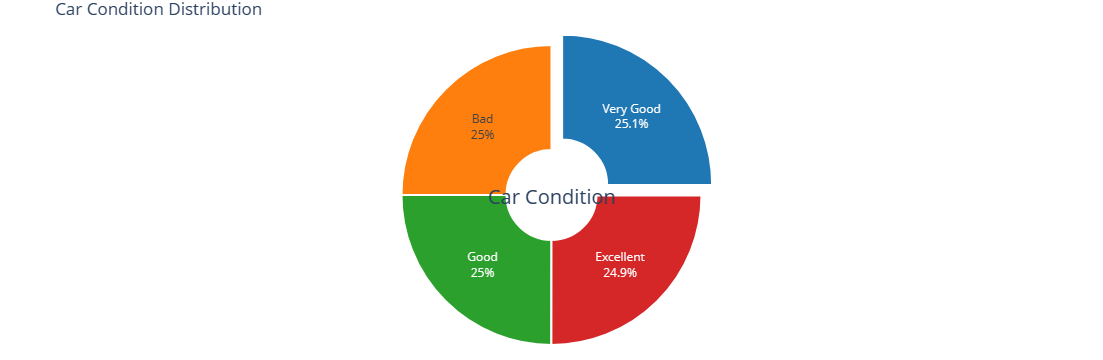

In [216]:
value_counts = df['Car Condition'].value_counts()

# Create the pie chart
fig = px.pie(
    names=value_counts.index,
    values=value_counts.values,
    hole=0.3,  # Donut chart with a hole in the center
)

# Customize the layout and appearance
fig.update_traces(
    textinfo='percent+label',
    pull=[0.1, 0],  # Explode the first slice (0.1)
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], line=dict(color='white', width=2))
)

fig.update_layout(
    title="Car Condition Distribution",
    showlegend=False,
    annotations=[
        dict(text='Car Condition', x=0.5, y=0.5, font_size=20, showarrow=False)
    ],
    margin=dict(l=0, r=0, t=30, b=0),
)

# Show the plot
fig.show()

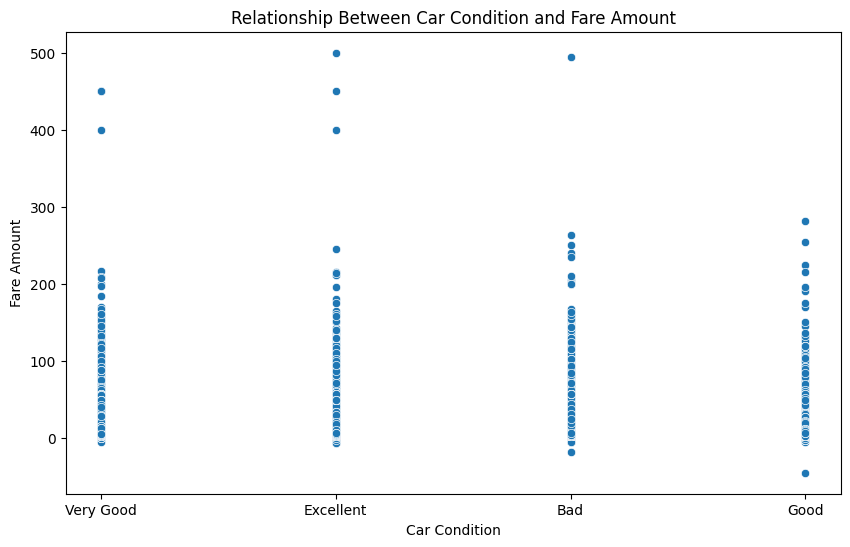

In [217]:
#relation between car_condition and fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Car Condition', y='fare_amount', data=df)
plt.title('Relationship Between Car Condition and Fare Amount')
plt.xlabel('Car Condition')
plt.ylabel('Fare Amount')
plt.show()

In [218]:
df['Weather'].value_counts()

Weather
sunny     100433
cloudy    100060
rainy      99968
stormy     99953
windy      99574
Name: count, dtype: int64

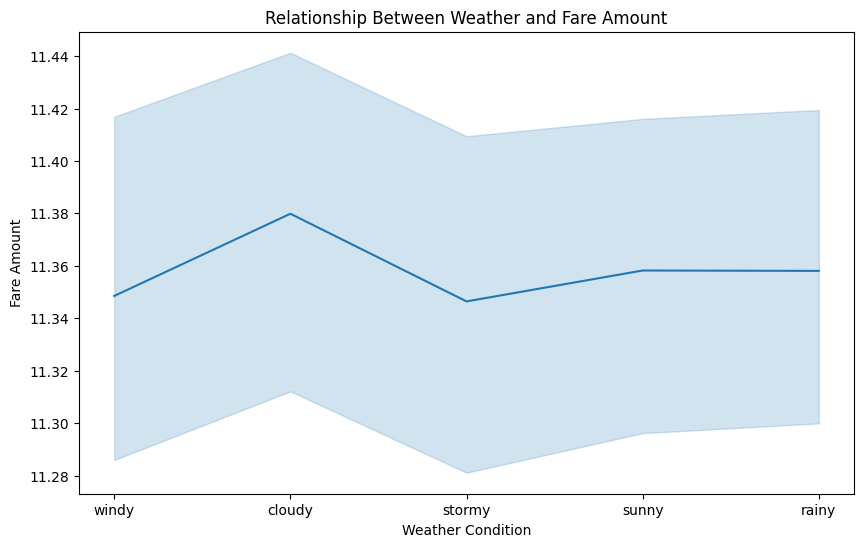

In [219]:
#relasion between weather and fare_amount
plt.figure(figsize=(10, 6))
sns.lineplot(x='Weather', y='fare_amount', data=df)
plt.title('Relationship Between Weather and Fare Amount')
plt.xlabel('Weather Condition')
plt.ylabel('Fare Amount')
plt.show()

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499988 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            499988 non-null  object 
 1   User Name          499988 non-null  object 
 2   Driver Name        499988 non-null  object 
 3   Car Condition      499988 non-null  object 
 4   Weather            499988 non-null  object 
 5   Traffic Condition  499988 non-null  object 
 6   key                499988 non-null  object 
 7   fare_amount        499988 non-null  float64
 8   pickup_datetime    499988 non-null  object 
 9   pickup_longitude   499988 non-null  float64
 10  pickup_latitude    499988 non-null  float64
 11  dropoff_longitude  499988 non-null  float64
 12  dropoff_latitude   499988 non-null  float64
 13  passenger_count    499988 non-null  int64  
 14  hour               499988 non-null  int64  
 15  day                499988 non-null  int64  
 16  month  

In [221]:
df['Traffic Condition'].value_counts()

Traffic Condition
Congested Traffic    166843
Dense Traffic        166581
Flow Traffic         166564
Name: count, dtype: int64

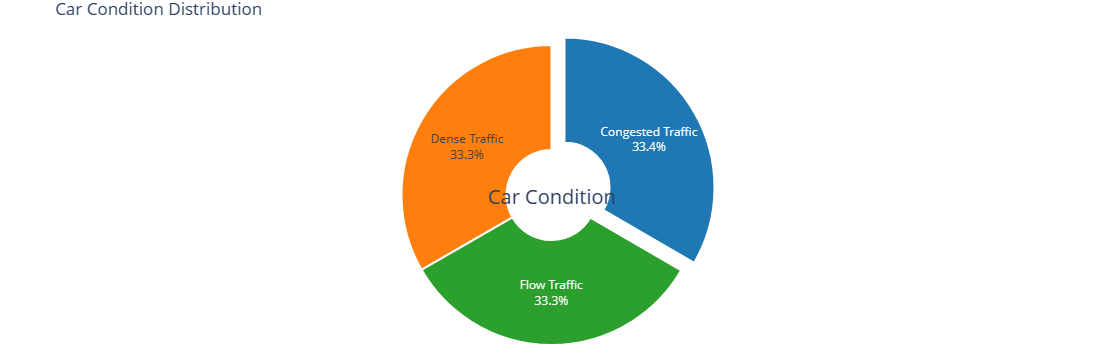

In [222]:
value_counts = df['Traffic Condition'].value_counts()

# Create the pie chart
fig = px.pie(
    names=value_counts.index,
    values=value_counts.values,
    hole=0.3,  # Donut chart with a hole in the center
)

# Customize the layout and appearance
fig.update_traces(
    textinfo='percent+label',
    pull=[0.1, 0],  # Explode the first slice (0.1)
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], line=dict(color='white', width=2))
)

fig.update_layout(
    title="Car Condition Distribution",
    showlegend=False,
    annotations=[
        dict(text='Car Condition', x=0.5, y=0.5, font_size=20, showarrow=False)
    ],
    margin=dict(l=0, r=0, t=30, b=0),
)

# Show the plot
fig.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_19480\1365669466.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




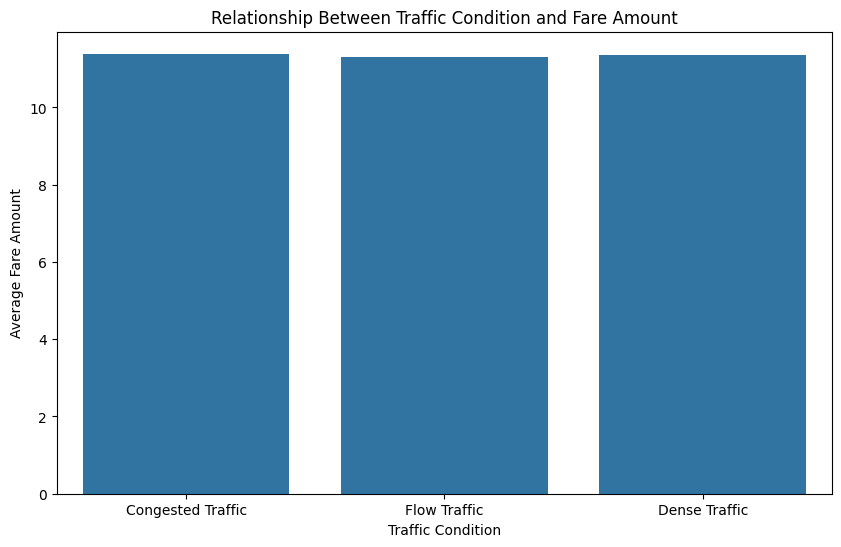

In [223]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Traffic Condition', y='fare_amount', data=df, ci=None)
plt.title('Relationship Between Traffic Condition and Fare Amount')
plt.xlabel('Traffic Condition')
plt.ylabel('Average Fare Amount')
plt.show()

In [224]:
df['key'].head()

0      2009-06-15 17:26:21.0000001
1      2010-01-05 16:52:16.0000002
2     2011-08-18 00:35:00.00000049
3      2012-04-21 04:30:42.0000001
4    2010-03-09 07:51:00.000000135
Name: key, dtype: object

In [225]:
df['key'] = pd.to_datetime(df['key'])

# Extract the minute and second components
df['minutes'] = df['key'].dt.minute
df['seconds'] = df['key'].dt.second

In [226]:
df.drop('key',axis=1,inplace=True)

In [227]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [228]:
df['pickup_latitude'].value_counts()

pickup_latitude
0.000000    9407
0.721975     166
0.711642      44
0.711642      42
0.711641      41
            ... 
0.711583       1
0.710745       1
0.710618       1
0.710443       1
0.710670       1
Name: count, Length: 119115, dtype: int64

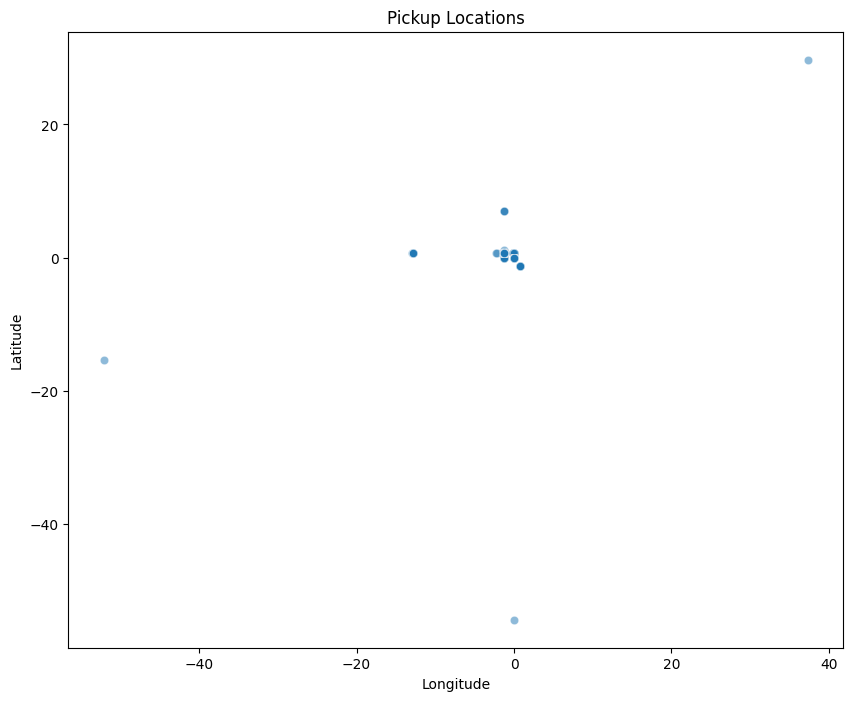

In [229]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, alpha=0.5)
plt.title('Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [230]:
#converting them to degrees
df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] = np.degrees(df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])

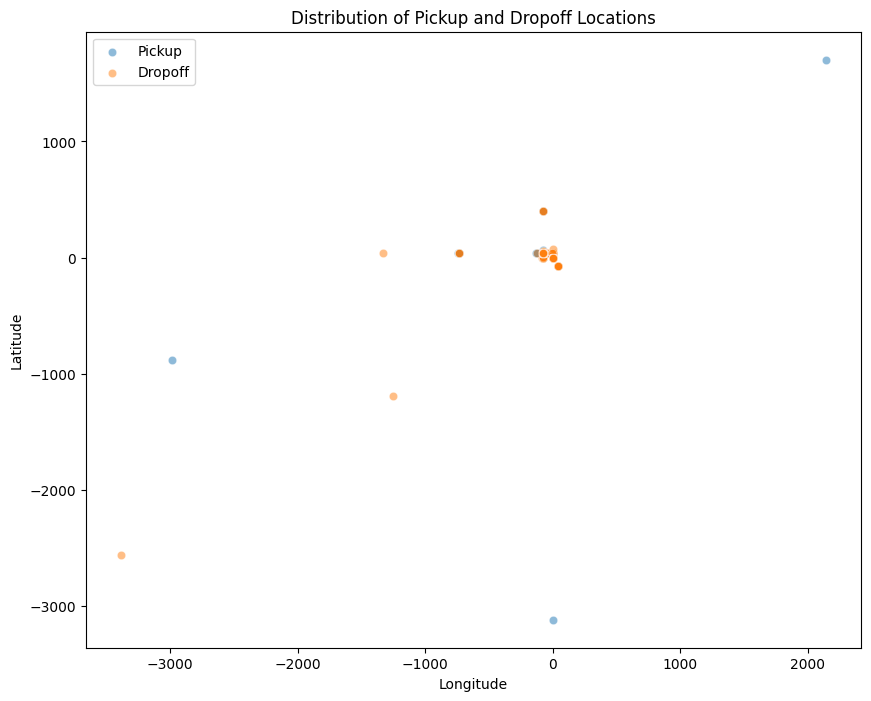

In [231]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, alpha=0.5, label='Pickup')
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, alpha=0.5, label='Dropoff')
plt.title('Distribution of Pickup and Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [232]:
#Removing Outliers
df = df[(df['pickup_longitude'].between(-74.05, -73.75)) &
        (df['pickup_latitude'].between(40.60, 40.90)) &
        (df['dropoff_longitude'].between(-74.05, -73.75)) &
        (df['dropoff_latitude'].between(40.60, 40.90))]

In [233]:
df.shape

(486982, 26)

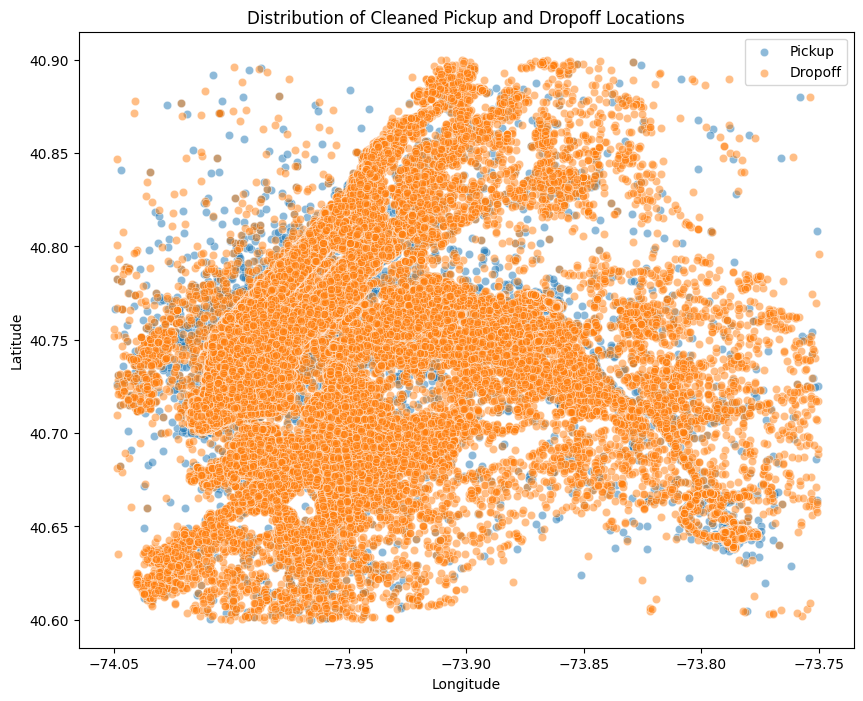

In [234]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, alpha=0.5, label='Pickup')
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, alpha=0.5, label='Dropoff')
plt.title('Distribution of Cleaned Pickup and Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

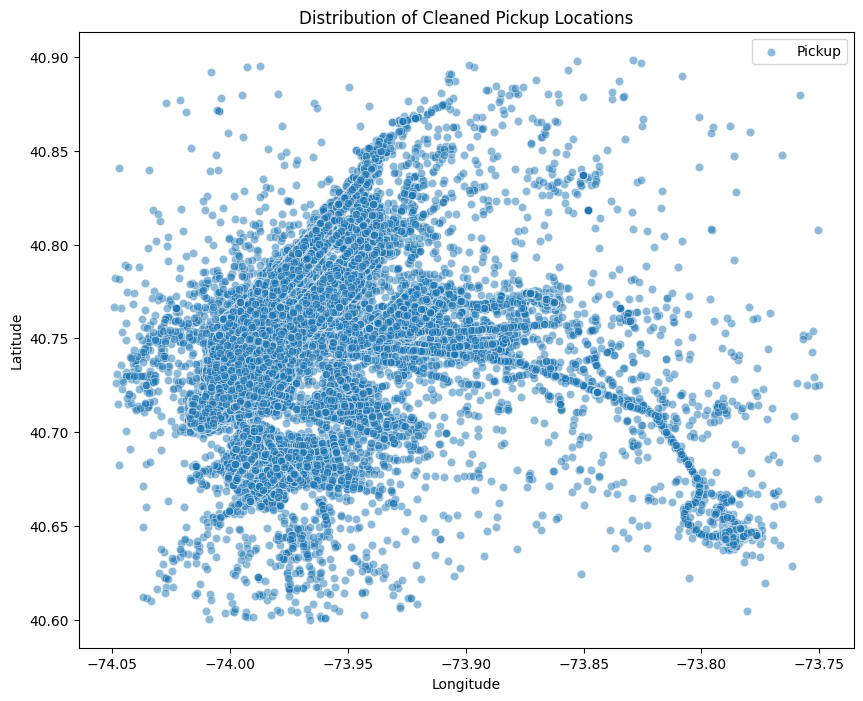

In [235]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, alpha=0.5, label='Pickup')

plt.title('Distribution of Cleaned Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

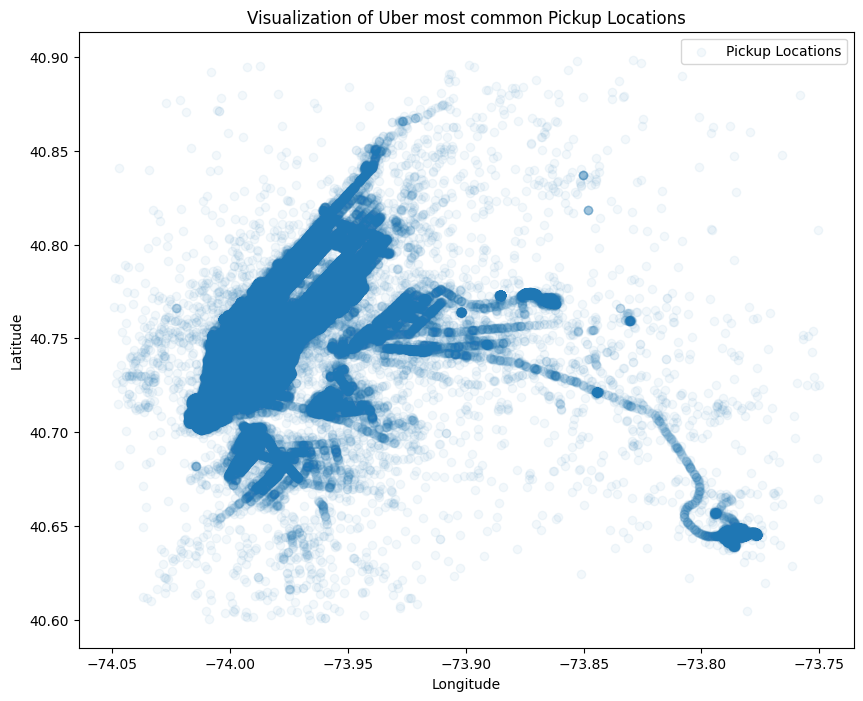

In [236]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting pickup locations
plt.figure(figsize=(10, 8))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], alpha=0.05, label='Pickup Locations')

# Plotting dropoff locations
#plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], alpha=0.03, color='blue', label='Dropoff Locations')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Visualization of Uber most common Pickup Locations')
plt.legend()
plt.show()


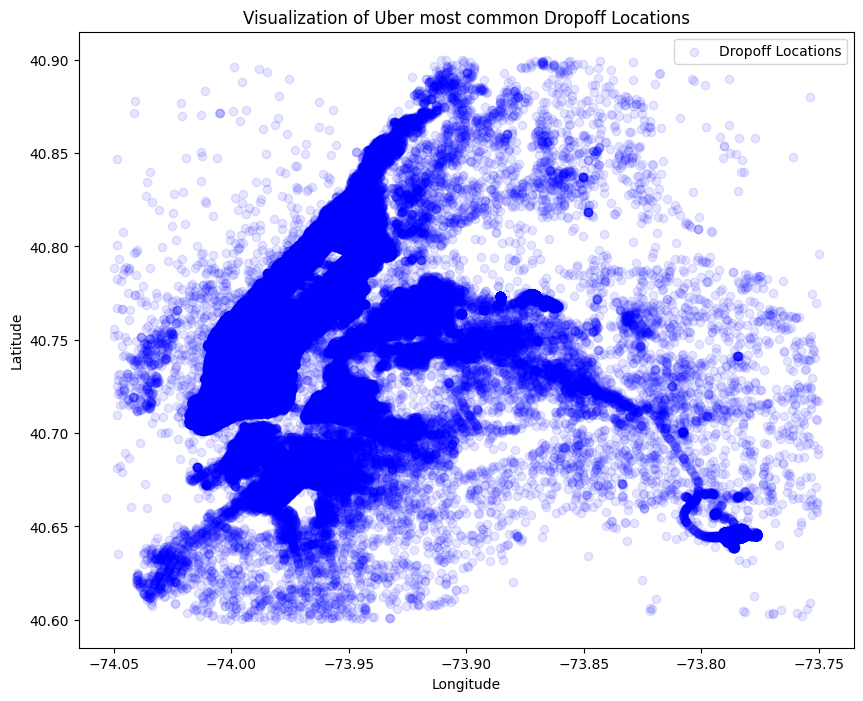

In [237]:
# Plotting pickup locations
plt.figure(figsize=(10, 8))
# plt.scatter(df['pickup_longitude'], df['pickup_latitude'], alpha=0.05, label='Pickup Locations')

# Plotting dropoff locations
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], alpha=0.1, color='blue', label='Dropoff Locations')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Visualization of Uber most common Dropoff Locations')
plt.legend()
plt.show()

## Dropoff Location doesn't seem to affect the fare amount

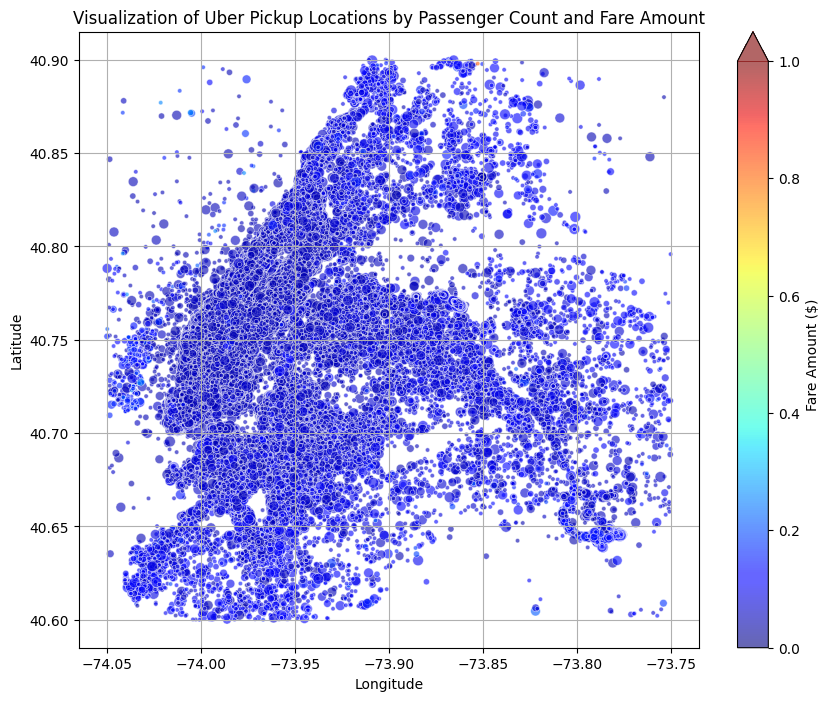

In [238]:
fare_color = (df['fare_amount'] - df['fare_amount'].min()) / (df['fare_amount'].max() - df['fare_amount'].min())

passenger_size = df['passenger_count'] * 10


plt.figure(figsize=(10, 8))

# Create a scatter plot using pickup locations
# Size of points represents the passenger count
# Color of points represents the normalized fare amount
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'],
            s=passenger_size,
            c=fare_color,
            cmap='jet', alpha=0.6, edgecolor='w', linewidth=0.5)

plt.colorbar(label='Fare Amount ($)', extend='max')


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Visualization of Uber Pickup Locations by Passenger Count and Fare Amount')
plt.grid(True)


plt.show()


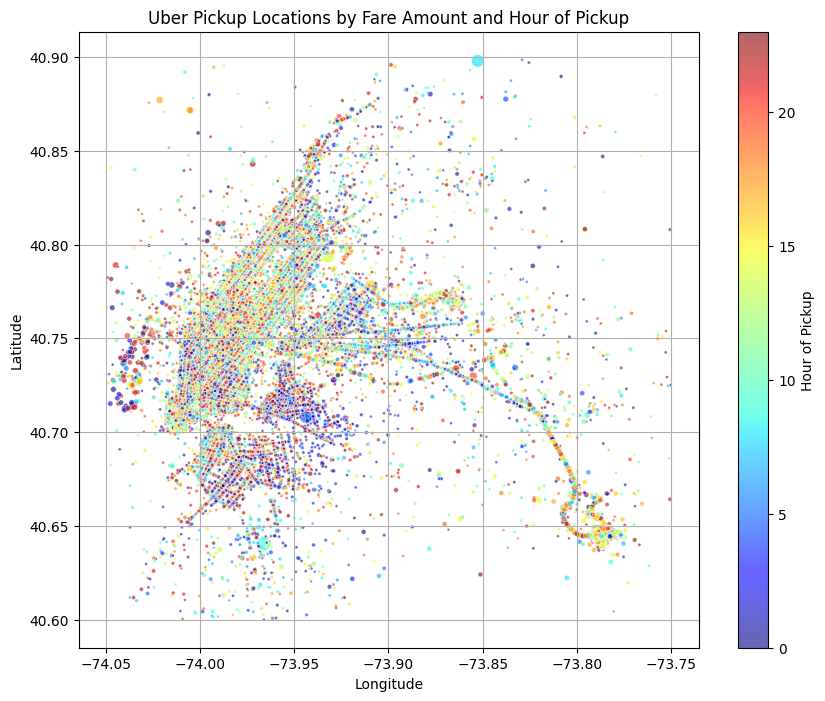

In [239]:

fare_size_normalized = (df['fare_amount'] - df['fare_amount'].min()) / (df['fare_amount'].max() - df['fare_amount'].min())
# scale up for visibility in the plot
fare_size = fare_size_normalized * 100

plt.figure(figsize=(10, 8))


scatter = plt.scatter(df['pickup_longitude'], df['pickup_latitude'],
                      s=fare_size,
                      c=df['hour'],
                      cmap='jet',
                      alpha=0.6,
                      edgecolor='w',
                      linewidth=0.5)


plt.colorbar(scatter, label='Hour of Pickup')

# Label the axes and title the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Uber Pickup Locations by Fare Amount and Hour of Pickup')
plt.grid(True)

# Show the plot
plt.show()


In [240]:
df['passenger_count'].value_counts()

passenger_count
1    336878
2     72092
5     34377
3     21224
6     10345
4     10317
0      1749
Name: count, dtype: int64

In [241]:
#Replace panger_count of 0 with 1
df['passenger_count'] = df['passenger_count'].replace(0, 1)

In [242]:
df['passenger_count'].value_counts()

passenger_count
1    338627
2     72092
5     34377
3     21224
6     10345
4     10317
Name: count, dtype: int64

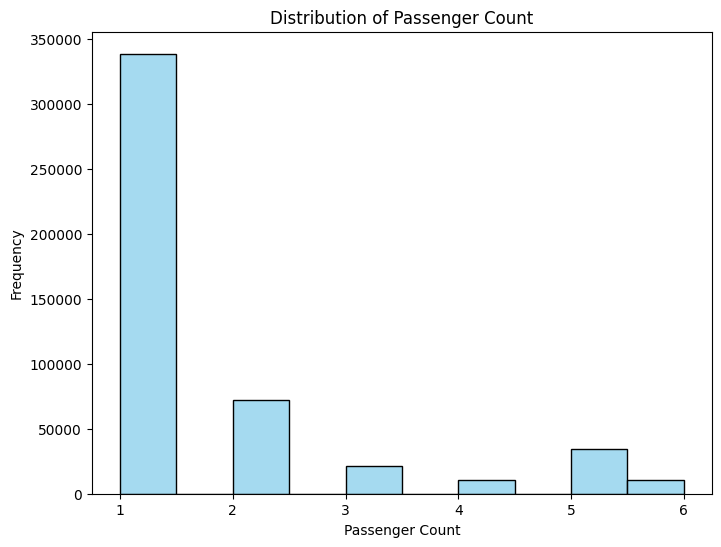

In [243]:
plt.figure(figsize=(8, 6))
sns.histplot(df['passenger_count'], bins=10,color='skyblue')
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

In [244]:
df.shape

(486982, 26)

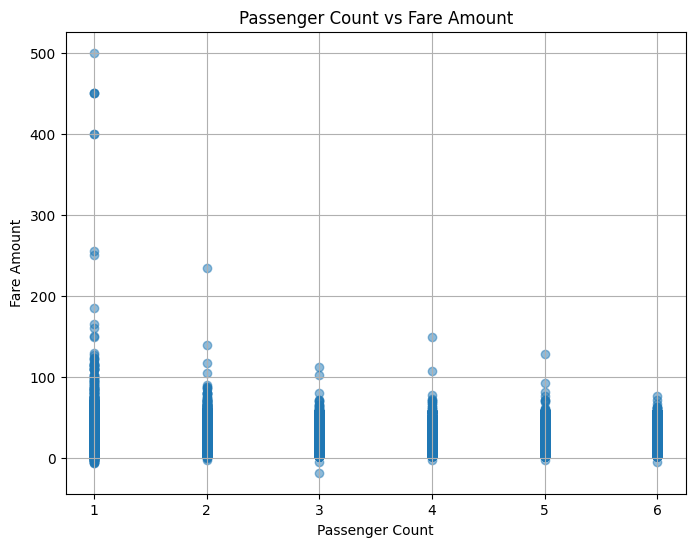

In [245]:
plt.figure(figsize=(8, 6))
plt.scatter(df['passenger_count'], df['fare_amount'], alpha=0.5)
plt.title('Passenger Count vs Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

In [246]:
df.head()

User ID          User Name       Driver Name Car Condition Weather  \
0  KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1  lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2  gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3  9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4  8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   

   Traffic Condition  fare_amount  pickup_longitude  pickup_latitude  \
0  Congested Traffic          4.5        -73.844311        40.721319   
1       Flow Traffic         16.9        -74.016048        40.711303   
2  Congested Traffic          5.7        -73.982738        40.761270   
3       Flow Traffic          7.7        -73.987130        40.733143   
4  Congested Traffic          5.3        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0         -73.841610         40.712278                1    17   15      6   
1         -73.979268         40.782004                1    16    5      1   
2         -73.991242         40.750562                2     0   18      8   
3         -73.991567         40.758092                1     4   21      4   
4         -73.956655         40.783762                1     7    9      3   

   weekday  year   jfk_dist   ewr_dist   lga_dist   sol_dist   nyc_dist  \
0        0  2009  20.265840  55.176046  14.342611  34.543548  27.572573   
1        1  2010  44.667679  31.832358  23.130775  15.125872   8.755732   
2        3  2011  43.597686  33.712082  19.865289  17.722624   9.847344   
3        5  2012  42.642965  32.556289  21.063132  15.738963   7.703421   
4        1  2010  43.329953  39.406828  15.219339  23.732406  15.600745   

   distance   bearing  minutes  seconds  
0  1.030764 -2.918897       26       21  
1  8.450134 -0.375217       52       16  
2  1.389525  2.599961       35        0  
3  2.799270  0.133905       30       42  
4  1.999157 -0.502703       51        0

Text(0.03, 0.98, 'Correlation Between Variables')

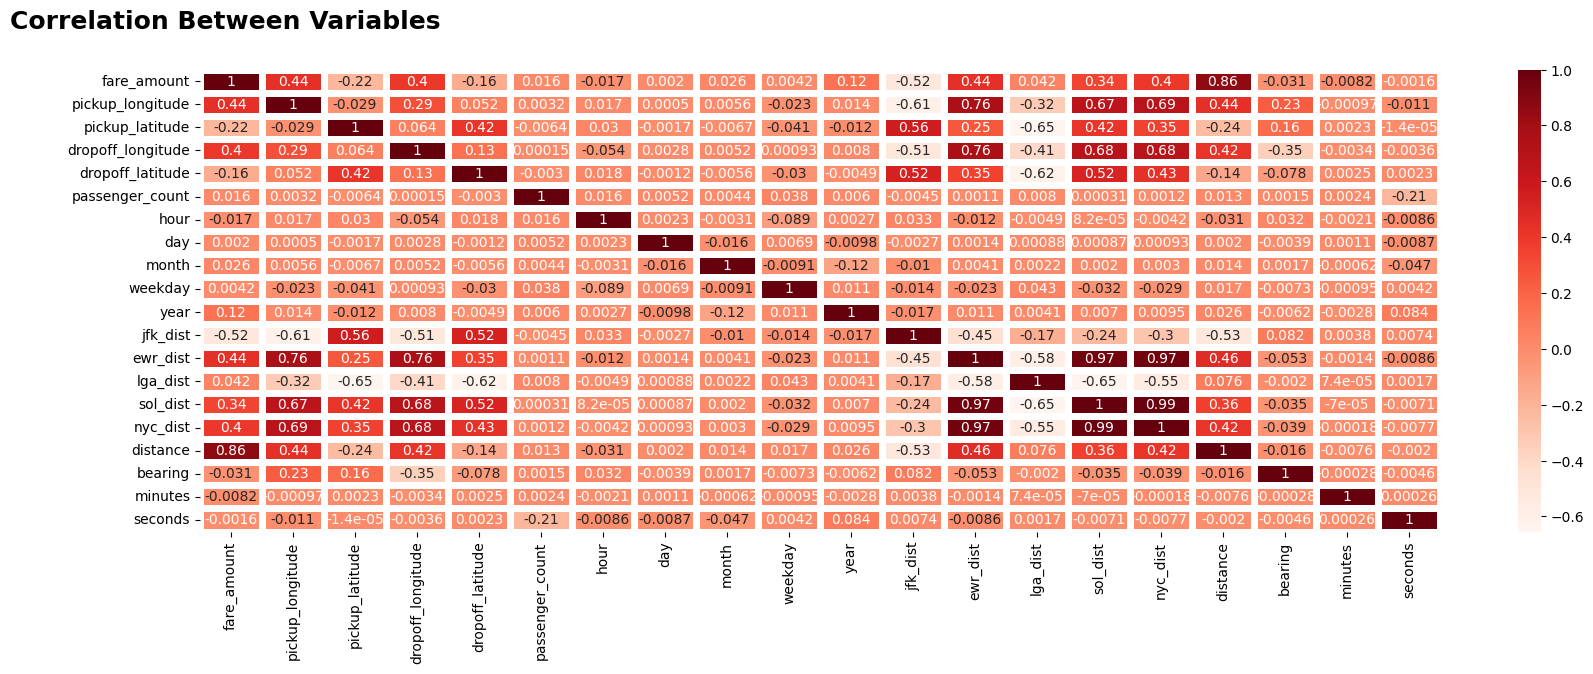

In [247]:
#Colleration_Heatmap (How strong the relations are between variables)
plt.rcParams['figure.figsize'] =(20, 6)
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Reds', linewidths=5)
plt.suptitle('Correlation Between Variables', fontweight='heavy',
             x=0.03, y=0.98, ha = "left", fontsize='18',
             fontfamily='sans-serif', color= "black")

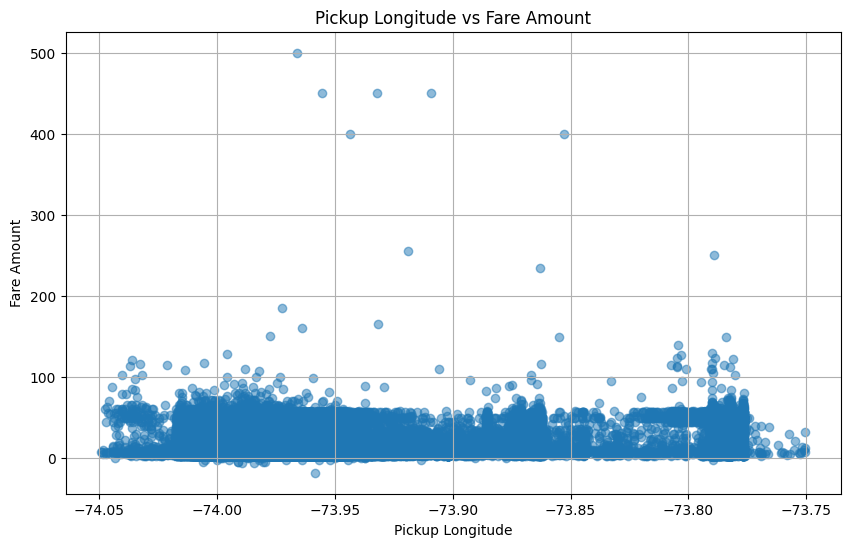

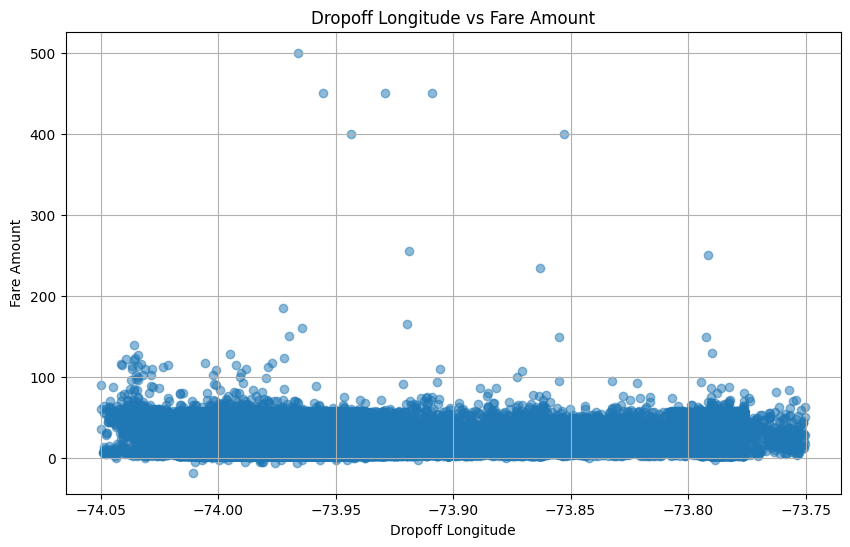

In [248]:
plt.figure(figsize=(10, 6))
plt.scatter(df['pickup_longitude'], df['fare_amount'], alpha=0.5)
plt.title('Pickup Longitude vs Fare Amount')
plt.xlabel('Pickup Longitude')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['dropoff_longitude'], df['fare_amount'], alpha=0.5)
plt.title('Dropoff Longitude vs Fare Amount')
plt.xlabel('Dropoff Longitude')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

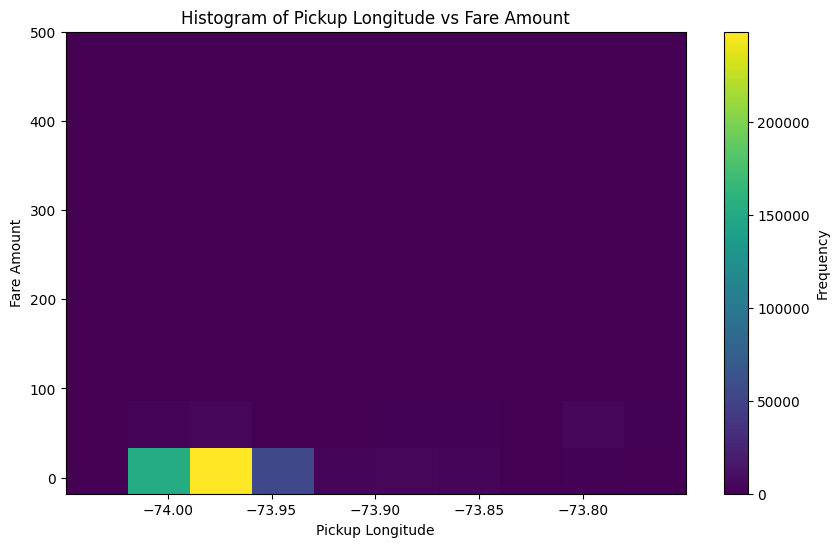

In [249]:
import matplotlib.pyplot as plt

bins = 10

plt.figure(figsize=(10, 6))
plt.hist2d(df['pickup_longitude'], df['fare_amount'], bins=bins, cmap='viridis')
plt.colorbar(label='Frequency')
plt.title('Histogram of Pickup Longitude vs Fare Amount')
plt.xlabel('Pickup Longitude')
plt.ylabel('Fare Amount')
plt.show()

In [250]:
df['hour'].value_counts()

hour
19    30582
18    29314
20    28486
21    27872
22    27097
14    24734
23    24211
12    24030
17    24004
13    23768
15    23396
9     23018
11    22776
8     22049
10    21889
16    20044
0     19079
7     17761
1     14154
2     10575
6     10031
3      7686
4      5643
5      4783
Name: count, dtype: int64

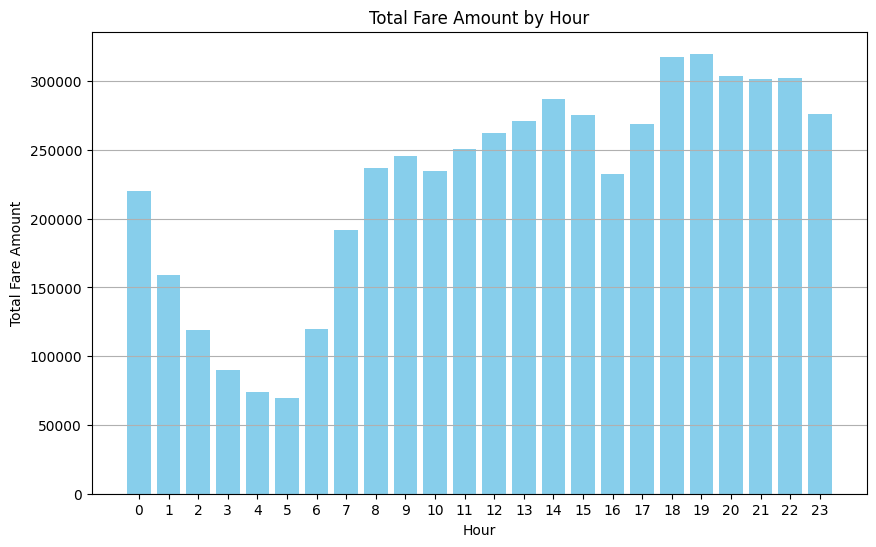

In [251]:
#ساعت الزروه من 18 الي 22
hourly_fare = df.groupby('hour')['fare_amount'].sum().reset_index()

# Sort the hourly_fare DataFrame by hour
hourly_fare_sorted = hourly_fare.sort_values(by='hour')

plt.figure(figsize=(10, 6))
plt.bar(hourly_fare_sorted['hour'], hourly_fare_sorted['fare_amount'], color='skyblue')
plt.title('Total Fare Amount by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Fare Amount')
plt.xticks(hourly_fare_sorted['hour'])
plt.grid(axis='y')
plt.show()

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486982 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            486982 non-null  object 
 1   User Name          486982 non-null  object 
 2   Driver Name        486982 non-null  object 
 3   Car Condition      486982 non-null  object 
 4   Weather            486982 non-null  object 
 5   Traffic Condition  486982 non-null  object 
 6   fare_amount        486982 non-null  float64
 7   pickup_longitude   486982 non-null  float64
 8   pickup_latitude    486982 non-null  float64
 9   dropoff_longitude  486982 non-null  float64
 10  dropoff_latitude   486982 non-null  float64
 11  passenger_count    486982 non-null  int64  
 12  hour               486982 non-null  int64  
 13  day                486982 non-null  int64  
 14  month              486982 non-null  int64  
 15  weekday            486982 non-null  int64  
 16  year   

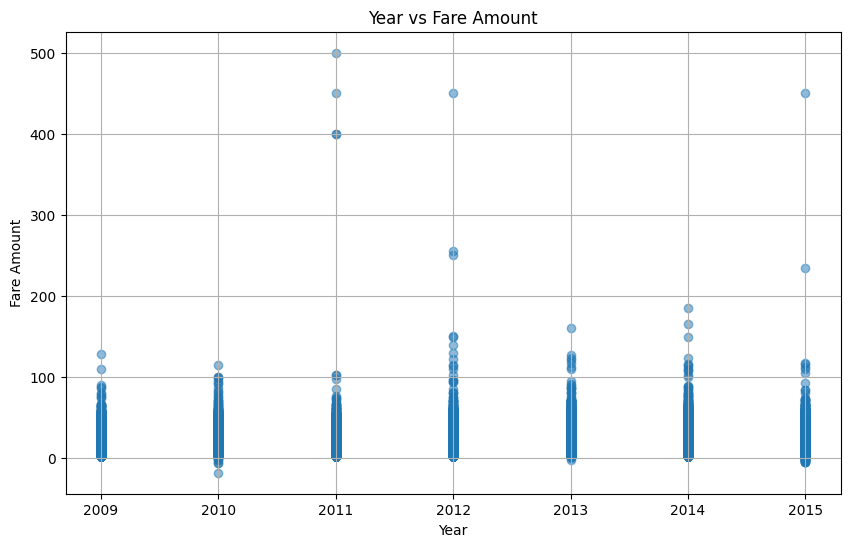

In [253]:
#2012 is the most highest year
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['fare_amount'], alpha=0.5)
plt.title('Year vs Fare Amount')
plt.xlabel('Year')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

In [254]:
new_columns_names={'jfk_dist':'distance_from_john_Kennedy_airport'
,'ewr_dist':'distance_from Neywork_Liberty_International_Airport'
,'lga_dist':'New_York_Municipal_Airport_LaGuardia_Field',
  'sol_dist':'distance_from_status_of_liberity','nyc_city':'distance_from_newyork_city'}

In [255]:
df.rename(columns=new_columns_names,inplace=True)

In [256]:
df.head()

User ID          User Name       Driver Name Car Condition Weather  \
0  KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1  lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2  gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3  9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4  8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   

   Traffic Condition  fare_amount  pickup_longitude  pickup_latitude  \
0  Congested Traffic          4.5        -73.844311        40.721319   
1       Flow Traffic         16.9        -74.016048        40.711303   
2  Congested Traffic          5.7        -73.982738        40.761270   
3       Flow Traffic          7.7        -73.987130        40.733143   
4  Congested Traffic          5.3        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0         -73.841610         40.712278                1    17   15      6   
1         -73.979268         40.782004                1    16    5      1   
2         -73.991242         40.750562                2     0   18      8   
3         -73.991567         40.758092                1     4   21      4   
4         -73.956655         40.783762                1     7    9      3   

   weekday  year  distance_from_john_Kennedy_airport  \
0        0  2009                           20.265840   
1        1  2010                           44.667679   
2        3  2011                           43.597686   
3        5  2012                           42.642965   
4        1  2010                           43.329953   

   distance_from Neywork_Liberty_International_Airport  \
0                                          55.176046     
1                                          31.832358     
2                                          33.712082     
3                                          32.556289     
4                                          39.406828     

   New_York_Municipal_Airport_LaGuardia_Field  \
0                                   14.342611   
1                                   23.130775   
2                                   19.865289   
3                                   21.063132   
4                                   15.219339   

   distance_from_status_of_liberity   nyc_dist  distance   bearing  minutes  \
0                         34.543548  27.572573  1.030764 -2.918897       26   
1                         15.125872   8.755732  8.450134 -0.375217       52   
2                         17.722624   9.847344  1.389525  2.599961       35   
3                         15.738963   7.703421  2.799270  0.133905       30   
4                         23.732406  15.600745  1.999157 -0.502703       51   

   seconds  
0       21  
1       16  
2        0  
3       42  
4        0

In [257]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'fare_amount', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'distance_from_john_Kennedy_airport',
       'distance_from Neywork_Liberty_International_Airport',
       'New_York_Municipal_Airport_LaGuardia_Field',
       'distance_from_status_of_liberity', 'nyc_dist', 'distance', 'bearing',
       'minutes', 'seconds'],
      dtype='object')

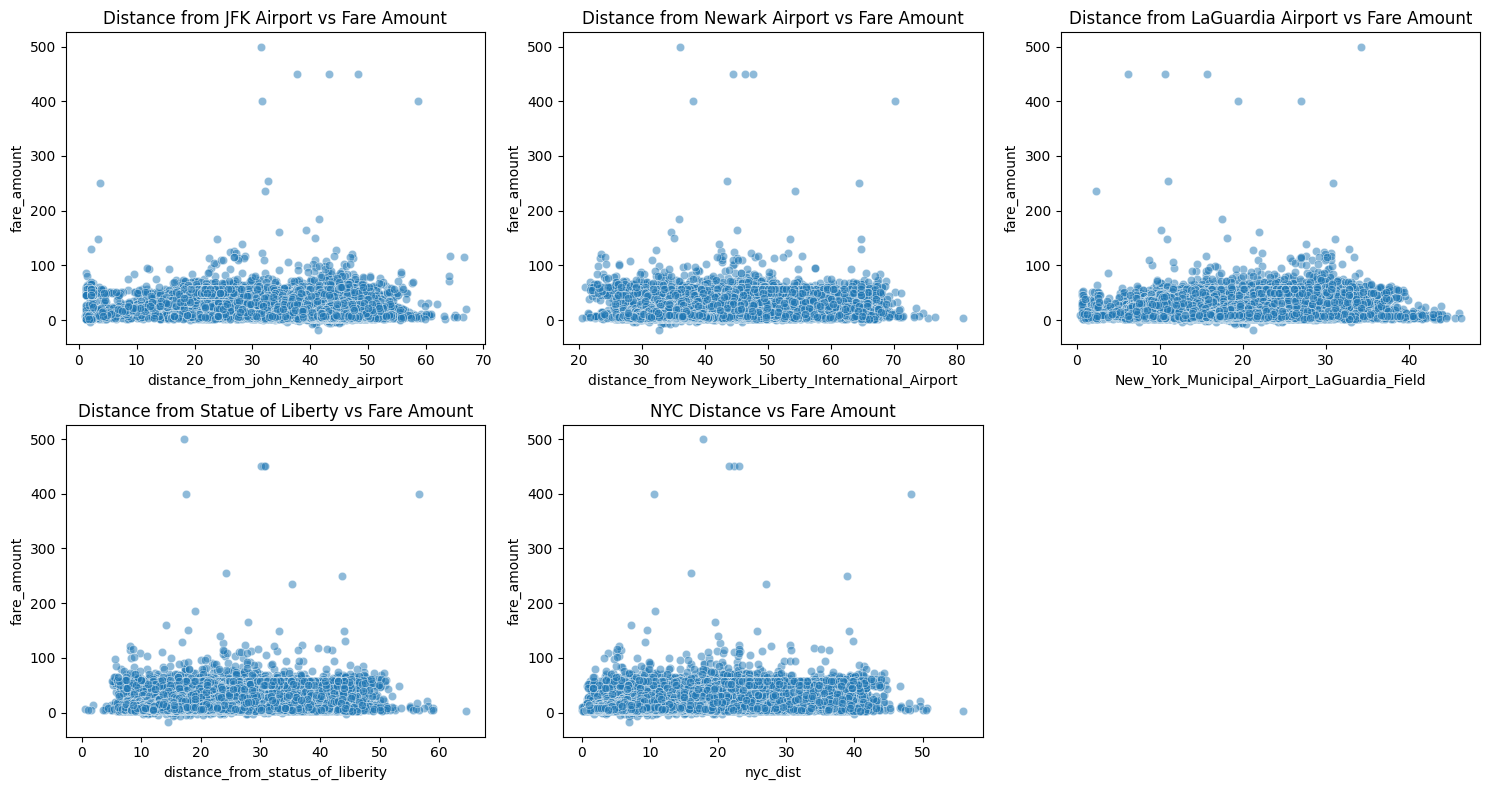

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the relationship between each distance column and fare_amount
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x='distance_from_john_Kennedy_airport', y='fare_amount', data=df, alpha=0.5)
plt.title('Distance from JFK Airport vs Fare Amount')

plt.subplot(2, 3, 2)
sns.scatterplot(x='distance_from Neywork_Liberty_International_Airport', y='fare_amount', data=df, alpha=0.5)
plt.title('Distance from Newark Airport vs Fare Amount')

plt.subplot(2, 3, 3)
sns.scatterplot(x='New_York_Municipal_Airport_LaGuardia_Field', y='fare_amount', data=df, alpha=0.5)
plt.title('Distance from LaGuardia Airport vs Fare Amount')

plt.subplot(2, 3, 4)
sns.scatterplot(x='distance_from_status_of_liberity', y='fare_amount', data=df, alpha=0.5)
plt.title('Distance from Statue of Liberty vs Fare Amount')

plt.subplot(2, 3, 5)
sns.scatterplot(x='nyc_dist', y='fare_amount', data=df, alpha=0.5)
plt.title('NYC Distance vs Fare Amount')

plt.tight_layout()
plt.show()


#removing_outliers
Q1 = df[['distance_from_john_Kennedy_airport','distance_from Neywork_Liberty_International_Airport','New_York_Municipal_Airport_LaGuardia_Field','distance_from_status_of_liberity','nyc_dist']].quantile(0.25)
Q3 = df[['distance_from_john_Kennedy_airport','distance_from Neywork_Liberty_International_Airport','New_York_Municipal_Airport_LaGuardia_Field','distance_from_status_of_liberity','nyc_dist']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df[['distance_from_john_Kennedy_airport','distance_from Neywork_Liberty_International_Airport','New_York_Municipal_Airport_LaGuardia_Field','distance_from_status_of_liberity','nyc_dist']] <= upper_bound).all(axis=1)]

In [259]:
df.shape

(458700, 26)

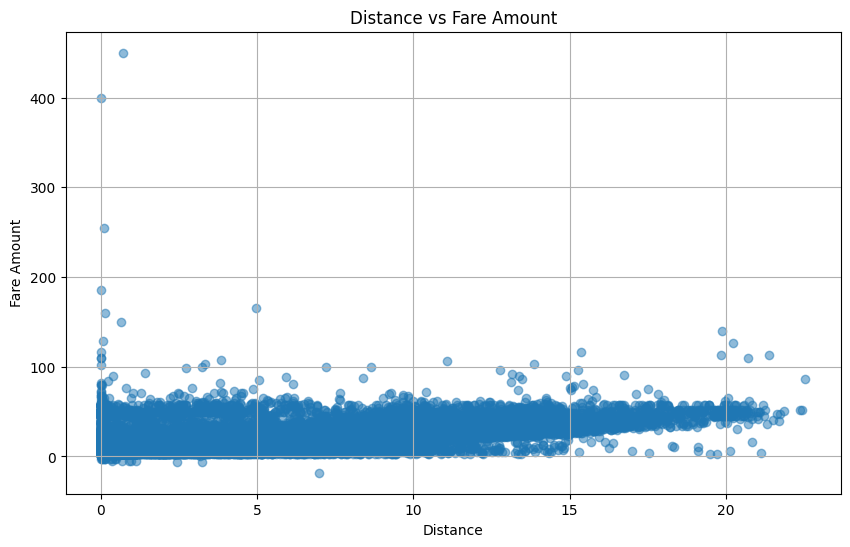

In [260]:
plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['fare_amount'], alpha=0.5)
plt.title('Distance vs Fare Amount')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

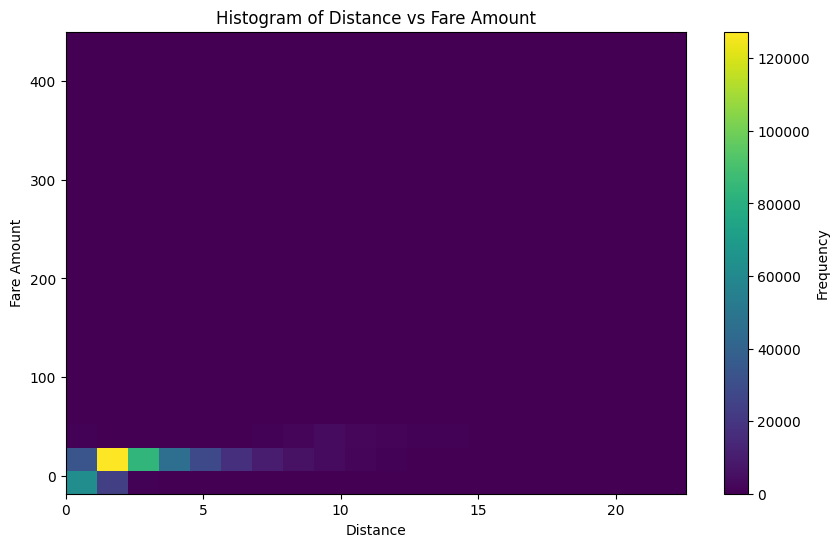

In [261]:
bins = 20

plt.figure(figsize=(10, 6))
plt.hist2d(df['distance'], df['fare_amount'], bins=bins, cmap='viridis')
plt.colorbar(label='Frequency')
plt.title('Histogram of Distance vs Fare Amount')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.show()

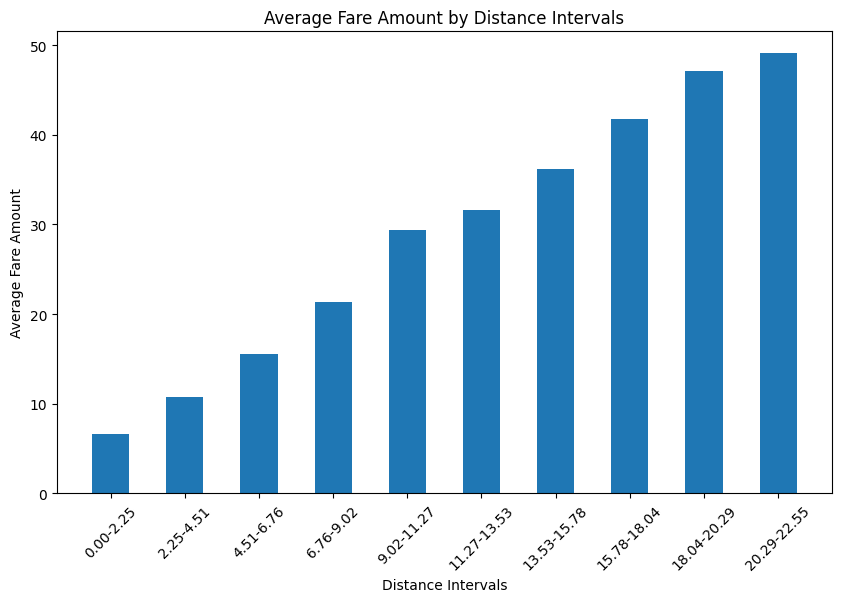

In [262]:
#when distance increase , fare amount increase
num_bins = 10
distance_min = df['distance'].min()
distance_max = df['distance'].max()
bin_size = (distance_max - distance_min) / num_bins

bins = [distance_min + i * bin_size for i in range(num_bins)]
bins.append(distance_max)

# Group data by distance intervals and calculate mean fare amount for each interval
fare_means = []
for i in range(num_bins):
    fare_mean = df[(df['distance'] >= bins[i]) & (df['distance'] < bins[i + 1])]['fare_amount'].mean()
    fare_means.append(fare_mean)

#
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(fare_means)), fare_means, width=0.5, align='center')
plt.xticks(np.arange(len(fare_means)), [f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(num_bins)], rotation=45)
plt.title('Average Fare Amount by Distance Intervals')
plt.xlabel('Distance Intervals')
plt.ylabel('Average Fare Amount')
plt.show()

Text(0.03, 0.98, 'Correlation Between Variables')

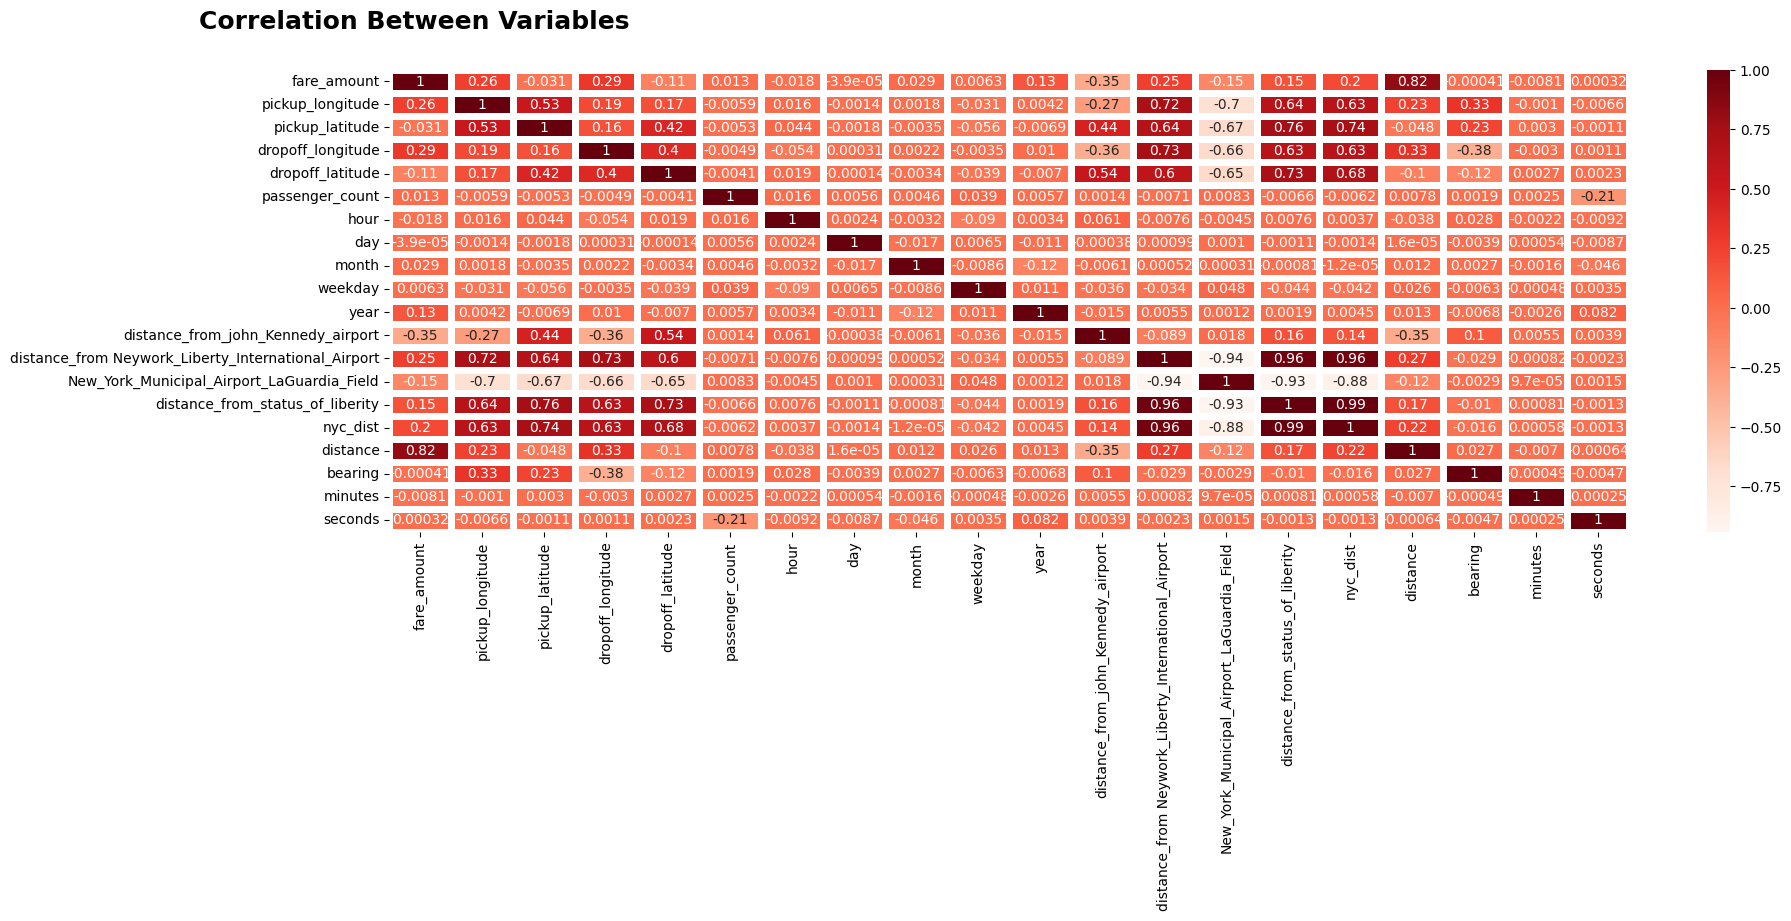

In [263]:
#Colleration_Heatmap (How strong the relations are between variables)
plt.rcParams['figure.figsize'] =(20, 6)
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Reds', linewidths=5)
plt.suptitle('Correlation Between Variables', fontweight='heavy',
             x=0.03, y=0.98, ha = "left", fontsize='18',
             fontfamily='sans-serif', color= "black")

#Label_Encoding and Standarlization


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458700 entries, 1 to 499999
Data columns (total 26 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   User ID                                              458700 non-null  object 
 1   User Name                                            458700 non-null  object 
 2   Driver Name                                          458700 non-null  object 
 3   Car Condition                                        458700 non-null  object 
 4   Weather                                              458700 non-null  object 
 5   Traffic Condition                                    458700 non-null  object 
 6   fare_amount                                          458700 non-null  float64
 7   pickup_longitude                                     458700 non-null  float64
 8   pickup_latitude                                      458700

In [265]:
df.shape

(458700, 26)

In [266]:
#Label_Encoding
categorical_columns = ['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather', 'Traffic Condition', 'year']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [183]:
# #Time to encode the days and months using sine and cosine functions, sinse they are cyclical patterns
df['month_sin'] = np.sin(2*np.pi*df['month']/12)
df['month_cos'] = np.cos(2*np.pi*df['month']/12)

df['day_sin'] = np.sin(2*np.pi*df['day']/31)
df['day_cos'] = np.cos(2*np.pi*df['day']/31)

df['weekday_sin'] = np.sin(2*np.pi*df['weekday']/7)
df['weekday_cos'] = np.cos(2*np.pi*df['weekday']/7)

df['hour_sin'] = np.sin(2*np.pi*df['hour']/24)
df['hour_cos'] = np.cos(2*np.pi*df['hour']/24)

df['minutes_sin'] = np.sin(2*np.pi*df['minutes']/60)
df['minutes_cos'] = np.cos(2*np.pi*df['minutes']/60)

df['seconds_sin'] = np.sin(2*np.pi*df['seconds']/60)
df['seconds_cos'] = np.cos(2*np.pi*df['seconds']/60)
df.drop(['month','day', 'weekday', 'hour', 'minutes', 'seconds'], axis = 1, inplace = True)
df.head()

User ID  User Name  Driver Name  Car Condition  Weather  Traffic Condition  \
1   160242     107124        78515              1        0                  2   
2   144785      66488         7588              0        2                  0   
3    31002     188770         9075              3        2                  2   
4    28185       3484        33997              0        2                  0   
5   163480     112143       206661              1        3                  0   

   fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   
5         12.1        -74.000964        40.731630         -73.972892   

   dropoff_latitude  passenger_count  year  \
1         40.782004                1     1   
2         40.750562                2     2   
3         40.758092                1     3   
4         40.783762                1     1   
5         40.758233                1     2   

   distance_from_john_Kennedy_airport  \
1                           44.667679   
2                           43.597686   
3                           42.642965   
4                           43.329953   
5                           42.335622   

   distance_from Neywork_Liberty_International_Airport  \
1                                          31.832358     
2                                          33.712082     
3                                          32.556289     
4                                          39.406828     
5                                          32.824930     

   New_York_Municipal_Airport_LaGuardia_Field  \
1                                   23.130775   
2                                   19.865289   
3                                   21.063132   
4                                   15.219339   
5                                   20.648176   

   distance_from_status_of_liberity   nyc_dist  distance   bearing  month_sin  \
1                         15.125872   8.755732  8.450134 -0.375217   0.500000   
2                         17.722624   9.847344  1.389525  2.599961  -0.866025   
3                         15.738963   7.703421  2.799270  0.133905   0.866025   
4                         23.732406  15.600745  1.999157 -0.502703   1.000000   
5                         15.741133   7.649541  3.787239 -0.674251   0.500000   

      month_cos   day_sin   day_cos  weekday_sin  weekday_cos  hour_sin  \
1  8.660254e-01  0.848644  0.528964     0.781831     0.623490 -0.866025   
2 -5.000000e-01 -0.485302 -0.874347     0.433884    -0.900969  0.000000   
3 -5.000000e-01 -0.897805 -0.440394    -0.974928    -0.222521  0.866025   
4  6.123234e-17  0.968077 -0.250653     0.781831     0.623490  0.965926   
5  8.660254e-01  0.937752  0.347305     0.433884    -0.900969  0.707107   

   hour_cos   minutes_sin  minutes_cos  seconds_sin   seconds_cos  
1 -0.500000 -7.431448e-01     0.669131     0.994522 -1.045285e-01  
2  1.000000 -5.000000e-01    -0.866025     0.000000  1.000000e+00  
3  0.500000  5.665539e-16    -1.000000    -0.951057 -3.090170e-01  
4 -0.258819 -8.090170e-01     0.587785     0.000000  1.000000e+00  
5 -0.707107 -8.660254e-01     0.500000    -1.000000 -1.836970e-16

In [267]:
df.describe()

User ID      User Name    Driver Name  Car Condition  \
count  458700.000000  458700.000000  458700.000000  458700.000000   
mean   105349.724820  105560.018374  105369.112047       1.500717   
std     60812.935011   59626.396109   59667.760672       1.118168   
min         0.000000       0.000000       0.000000       0.000000   
25%     52753.000000   52619.000000   52342.000000       1.000000   
50%    105487.000000  104555.000000  104034.500000       2.000000   
75%    158227.250000  156629.000000  156559.000000       3.000000   
max    209947.000000  209947.000000  210151.000000       3.000000   

             Weather  Traffic Condition    fare_amount  pickup_longitude  \
count  458700.000000      458700.000000  458700.000000     458700.000000   
mean        1.998995           0.999972      10.167547        -73.979670   
std         1.413139           0.816499       6.893628          0.022205   
min         0.000000           0.000000     -18.100000        -74.046275   
25%         1.000000           0.000000       6.000000        -73.992683   
50%         2.000000           1.000000       8.100000        -73.982590   
75%         3.000000           2.000000      12.000000        -73.970403   
max         4.000000           2.000000     450.000000        -73.783575   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
count    458700.000000      458700.000000     458700.000000    458700.000000   
mean         40.751672         -73.977854         40.751302         1.684293   
std           0.022014           0.023674          0.025263         1.301368   
min          40.614025         -74.049725         40.600642         1.000000   
25%          40.737242         -73.991911         40.736537         1.000000   
50%          40.753180         -73.981407         40.753603         1.000000   
75%          40.766500         -73.968021         40.767287         2.000000   
max          40.865630         -73.779822         40.870930         6.000000   

                hour            day          month        weekday  \
count  458700.000000  458700.000000  458700.000000  458700.000000   
mean       13.539621      15.673503       6.267083       3.039148   
std         6.490125       8.679614       3.442027       1.944941   
min         0.000000       1.000000       1.000000       0.000000   
25%         9.000000       8.000000       3.000000       1.000000   
50%        14.000000      16.000000       6.000000       3.000000   
75%        19.000000      23.000000       9.000000       5.000000   
max        23.000000      31.000000      12.000000       6.000000   

                year  distance_from_john_Kennedy_airport  \
count  458700.000000                       458700.000000   
mean        2.732897                           42.279002   
std         1.862083                            2.370779   
min         0.000000                           20.031786   
25%         1.000000                           41.434938   
50%         3.000000                           42.502971   
75%         4.000000                           43.621663   
max         6.000000                           47.201416   

       distance_from Neywork_Liberty_International_Airport  \
count                                      458700.000000     
mean                                           34.865083     
std                                             3.837443     
min                                            24.123381     
25%                                            32.003909     
50%                                            34.391173     
75%                                            37.433578     
max                                            46.879962     

       New_York_Municipal_Airport_LaGuardia_Field  \
count                               458700.000000   
mean                                    19.377771   
std                                      3.565012   
min                                      6.590799  

In [184]:
#We will apply the Z-Score normalization
num_columns = ['fare_amount','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance_from_john_Kennedy_airport','distance_from Neywork_Liberty_International_Airport','New_York_Municipal_Airport_LaGuardia_Field','distance_from_status_of_liberity','nyc_dist', 'distance', 'bearing']

# Min-Max scaling function
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

# Apply Min-Max scaling to selected columns
df[num_columns] = df[num_columns].apply(min_max_scaling)
df.head(10)

User ID  User Name  Driver Name  Car Condition  Weather  \
1    160242     107124        78515              1        0   
2    144785      66488         7588              0        2   
3     31002     188770         9075              3        2   
4     28185       3484        33997              0        2   
5    163480     112143       206661              1        3   
6     33537      84693        33504              1        4   
7    187851       3733        41276              2        3   
8     43484      13060         9657              1        1   
9     56491     146486        49398              3        3   
10    83923      51795        75257              0        2   

    Traffic Condition  fare_amount  pickup_longitude  pickup_latitude  \
1                   2     0.074770          0.115063         0.386630   
2                   0     0.050844          0.241861         0.585223   
3                   2     0.055116          0.225143         0.473433   
4                   0     0.049989          0.297602         0.612003   
5                   0     0.064516          0.172482         0.467419   
6                   2     0.054689          0.252276         0.547036   
7                   0     0.073916          0.361534         0.636367   
8                   1     0.057894          0.151553         0.447877   
9                   1     0.057680          0.249779         0.476334   
10                  2     0.049989          0.190103         0.489327   

    dropoff_longitude  dropoff_latitude  passenger_count  year  \
1            0.261046          0.670995              0.0     1   
2            0.216682          0.554668              0.2     2   
3            0.215477          0.582527              0.0     3   
4            0.344828          0.677500              0.0     1   
5            0.284669          0.583048              0.0     2   
6            0.281297          0.607500              0.0     3   
7            0.220931          0.556466              0.0     3   
8            0.209879          0.484616              0.0     3   
9            0.215577          0.582697              0.2     0   
10           0.255662          0.491761              0.0     3   

    distance_from_john_Kennedy_airport  \
1                             0.906744   
2                             0.867362   
3                             0.832223   
4                             0.857508   
5                             0.820911   
6                             0.829288   
7                             0.828183   
8                             0.817412   
9                             0.816610   
10                            0.781218   

    distance_from Neywork_Liberty_International_Airport  \
1                                            0.338758     
2                                            0.421359     
3                                            0.370570     
4                                            0.671606     
5                                            0.382375     
6                                            0.499162     
7                                            0.558342     
8                                            0.241023     
9                                            0.394762     
10                                           0.338478     

    New_York_Municipal_Airport_LaGuardia_Field  \
1                                     0.724662   
2                                     0.581592   
3                                     0.634073   
4                                     0.378040   
5                                     0.615893   
6                                     0.504850   
7                                     0.453844   
8                                     0.760216   
9                                     0.611090   
10                                    0.660063   

    distance_from_status_of_liberity  nyc_dist  distance   bearing  \
1                           0.354365  0.35332

In [185]:
df.describe()

User ID      User Name    Driver Name  Car Condition  \
count  458700.000000  458700.000000  458700.000000  458700.000000   
mean   105349.724820  105560.018374  105369.112047       1.500717   
std     60812.935011   59626.396109   59667.760672       1.118168   
min         0.000000       0.000000       0.000000       0.000000   
25%     52753.000000   52619.000000   52342.000000       1.000000   
50%    105487.000000  104555.000000  104034.500000       2.000000   
75%    158227.250000  156629.000000  156559.000000       3.000000   
max    209947.000000  209947.000000  210151.000000       3.000000   

             Weather  Traffic Condition    fare_amount  pickup_longitude  \
count  458700.000000      458700.000000  458700.000000     458700.000000   
mean        1.998995           0.999972       0.060388          0.253541   
std         1.413139           0.816499       0.014727          0.084528   
min         0.000000           0.000000       0.000000          0.000000   
25%         1.000000           0.000000       0.051485          0.204005   
50%         2.000000           1.000000       0.055971          0.242425   
75%         3.000000           2.000000       0.064302          0.288816   
max         4.000000           2.000000       1.000000          1.000000   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
count    458700.000000      458700.000000     458700.000000    458700.000000   
mean          0.547075           0.266285          0.557406         0.136859   
std           0.087496           0.087714          0.093468         0.260274   
min           0.000000           0.000000          0.000000         0.000000   
25%           0.489724           0.214203          0.502779         0.000000   
50%           0.553069           0.253120          0.565920         0.000000   
75%           0.606009           0.302716          0.616547         0.200000   
max           1.000000           1.000000          1.000000         1.000000   

                year  distance_from_john_Kennedy_airport  \
count  458700.000000                       458700.000000   
mean        2.732897                            0.818827   
std         1.862083                            0.087258   
min         0.000000                            0.000000   
25%         1.000000                            0.787760   
50%         3.000000                            0.827070   
75%         4.000000                            0.868244   
max         6.000000                            1.000000   

       distance_from Neywork_Liberty_International_Airport  \
count                                      458700.000000     
mean                                            0.472026     
std                                             0.168630     
min                                             0.000000     
25%                                             0.346297     
50%                                             0.451201     
75%                                             0.584894     
max                                             1.000000     

       New_York_Municipal_Airport_LaGuardia_Field  \
count                               458700.000000   
mean                                     0.560233   
std                                      0.156193   
min                                      0.000000   
25%                                      0.459590   
50%                                      0.564320   
75%                                      0.668594   
max                                      1.000000   

       distance_from_status_of_liberity       nyc_dist       distance  \
count                     458700.000000  458700.000000  458700.000000   
mean                           0.464255       0.413054       0.126727   
std                            0.170667       0.178361       0.108231   
min                            0.000000       0.000000       0.000000   
25%                            0.335399   

In [84]:
from sklearn.feature_selection import f_regression

X = df.drop('fare_amount', axis=1)
y = df['fare_amount']
feature_names = X.columns

# Using f_classif for feature selection
f_scores, _ =f_regression(X, y)

# Normalizing the Fisher Scores to get feature weights
feature_weights = f_scores / np.sum(f_scores)
features_df = pd.DataFrame({'Feature': feature_names, 'Fisher_Score': feature_weights})
features_df.head(30)
features_df.columns

Index(['Feature', 'Fisher_Score'], dtype='object')

In [85]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(score_func=f_regression, k=15)
selector.fit(X, y)

selector.fit(X, y)

# Get the scores and p-values of each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': selector.scores_, 'P-Value': selector.pvalues_})

# Sort the features based on their F-scores in descending order
feature_scores.sort_values(by='F-Score', ascending=False, inplace=True)

# Select the top k features based on F-scores or a significance threshold
# For instance, you can select the top 10 features
top_15_features = feature_scores.head(14)['Feature'].tolist()



print(f"Selected features:{top_15_features}")

Selected features:['distance', 'distance_from_john_Kennedy_airport', 'dropoff_longitude', 'pickup_longitude', 'distance_from Neywork_Liberty_International_Airport', 'nyc_dist', 'distance_from_status_of_liberity', 'New_York_Municipal_Airport_LaGuardia_Field', 'year', 'dropoff_latitude', 'pickup_latitude', 'month_sin', 'passenger_count', 'hour_sin']


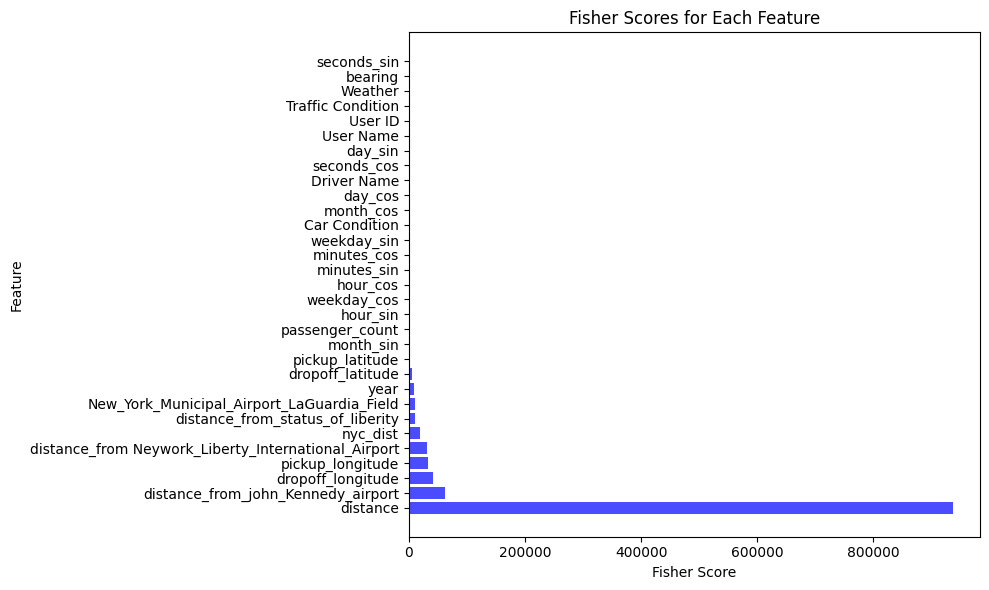

In [86]:
# Plot the horizontal bar chart
features_scores = feature_scores.sort_values(by='F-Score', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['Feature'], feature_scores['F-Score'], color='blue', alpha=0.7)
plt.xlabel('Fisher Score')
plt.ylabel('Feature')
plt.title('Fisher Scores for Each Feature')
plt.tight_layout()
plt.show()

In [87]:
feature_scores.head()

Feature        F-Score  P-Value
17                                           distance  936558.834978      0.0
12                 distance_from_john_Kennedy_airport   62831.664704      0.0
8                                   dropoff_longitude   42028.239310      0.0
6                                    pickup_longitude   32474.154904      0.0
13  distance_from Neywork_Liberty_International_Ai...   31523.026185      0.0

In [88]:
X_final = X[top_15_features]
X_final.head()


distance  distance_from_john_Kennedy_airport  dropoff_longitude  \
1  0.374775                            0.906744           0.261046   
2  0.061627                            0.867362           0.216682   
3  0.124151                            0.832223           0.215477   
4  0.088665                            0.857508           0.344828   
5  0.167969                            0.820911           0.284669   

   pickup_longitude  distance_from Neywork_Liberty_International_Airport  \
1          0.115063                                           0.338758     
2          0.241861                                           0.421359     
3          0.225143                                           0.370570     
4          0.297602                                           0.671606     
5          0.172482                                           0.382375     

   nyc_dist  distance_from_status_of_liberity  \
1  0.353320                          0.354365   
2  0.397779                          0.451523   
3  0.310462                          0.377304   
4  0.632100                          0.676381   
5  0.308268                          0.377385   

   New_York_Municipal_Airport_LaGuardia_Field  year  dropoff_latitude  \
1                                    0.724662     1          0.670995   
2                                    0.581592     2          0.554668   
3                                    0.634073     3          0.582527   
4                                    0.378040     1          0.677500   
5                                    0.615893     2          0.583048   

   pickup_latitude  month_sin  passenger_count  hour_sin  
1         0.386630   0.500000              0.0 -0.866025  
2         0.585223  -0.866025              0.2  0.000000  
3         0.473433   0.866025              0.0  0.866025  
4         0.612003   1.000000              0.0  0.965926  
5         0.467419   0.500000              0.0  0.707107

In [89]:
X_final.shape

(458700, 14)

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [91]:
def train_model_and_evaluate(Model, model_details, deg=1):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    poly_features_X = poly.fit_transform(X_final)

    X_train, X_test, y_train, y_test = train_test_split(poly_features_X, y, train_size=0.8, random_state=42)
    Model.fit(X_train, y_train)
    predictions = Model.predict(X_test)
    MSE = mean_squared_error(y_test, predictions)
    RMSE = math.sqrt(MSE)
    print(model_details)
    print(f"MSE: {MSE}")
    print(f"RMSE: {RMSE}")

In [92]:
train_model_and_evaluate(LinearRegression(), "Linear Regression with 1 degree")

Linear Regression with 1 degree
MSE: 6.989109155112469e-05
RMSE: 0.0083600892071272


train_model_and_evaluate(LinearRegression(), "Polynomial Regression with 2 degree", 2)


train_model_and_evaluate(LinearRegression(), "Polynomial Regression with 3 degree", 3)

In [93]:
train_model_and_evaluate(Ridge(alpha = 1.0), "Ridge Regression with 1 degree")

Ridge Regression with 1 degree
MSE: 6.99914561476927e-05
RMSE: 0.008366089656924118


train_model_and_evaluate(Ridge(), "Ridge Regression with 2 degree", 2)

train_model_and_evaluate(Ridge(), "Ridge Regression with 3 degree", 3)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, train_size=0.8, random_state=42)


In [95]:
#the model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = random_forest_model.predict(X_test)



# Evaluate the model


In [96]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 5.5521730088153026e-05
Root Mean Squared Error (RMSE): 0.007451290498172315
R-squared (R2): 0.7501602089773666


# Fine Tuning



In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


# Evaluate the best model


In [98]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) of the best model: {mse}")
print(f"Root Mean Squared Error (RMSE) of the best model: {rmse}")
print(f"R-squared (R2) of the best model: {r2}")

Mean Squared Error (MSE) of the best model: 5.5521730088153026e-05
Root Mean Squared Error (RMSE) of the best model: 0.007451290498172315
R-squared (R2) of the best model: 0.7501602089773666


In [99]:
!pip install joblib
from joblib import dump

You should consider upgrading via the 'D:\ML Task 2 Deployement\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [101]:
X_final.columns

Index(['distance', 'distance_from_john_Kennedy_airport', 'dropoff_longitude',
       'pickup_longitude',
       'distance_from Neywork_Liberty_International_Airport', 'nyc_dist',
       'distance_from_status_of_liberity',
       'New_York_Municipal_Airport_LaGuardia_Field', 'year',
       'dropoff_latitude', 'pickup_latitude', 'month_sin', 'passenger_count',
       'hour_sin'],
      dtype='object')